# Setting GPU

In [1]:
import os

# PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
# os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
# os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH'] 
os.environ['PATH'] 

'/data/students_home/amoscatelli/.local/bin:/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/bin:/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/local/cuda/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin'

In [2]:
import os
# with tf.device("/GPU:0"):
# os.environ["CUDA_VISIBLE_DEVICES"]="1,2"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
import tensorflow as tf
tf.test.is_built_with_cuda()

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

True

In [4]:
from keras import backend as K
import tensorflow as tf
# import os
# with tf.device("/GPU:0"):
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
import tensorflow as tf
from tensorflow.python.client import device_lib
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14984974986369234442, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 946736774547955114
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 42008576
 locality {
   bus_id: 2
   numa_node: 1
   links {
   }
 }
 incarnation: 11271262882767365727
 physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:81:00.0, compute capability: 5.2", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11943863492611482095
 physical_device_desc: "device: XLA_GPU device"]

In [6]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
# config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

# Setting for training

In [1]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

In [2]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.3.1'

## Load Dataset and count zero's

In [3]:
import numpy as np
import pickle
def getData(datasetName):
    with open(datasetName,'rb') as file_in:
#         features, labels, setups, cameras, performers, replications = pickle.load(file_in)
        train_set, val_set, test_set = pickle.load(file_in)
    
    #### stats ################################
    labels = ["train_set", "val_set", "test_set"]
    for i,dataset in enumerate([train_set, val_set, test_set]):
        totalsize, zero_elements =  getZeroStatsForDataset(dataset[0])
        print("{} shape: {}".format(labels[i], dataset[0].shape))
        print("{} zero elements: {}/{} ({:.2}%)".format(labels[i],zero_elements,totalsize,zero_elements*100/totalsize))
        
    return train_set, val_set, test_set

def getZeroStatsForDataset(X):
    totalsize = sum([len(x)*len(x[0])*2 for x in X])
    non_zero_elements = sum([np.count_nonzero(x) for x in X])
    zero_elements = totalsize - non_zero_elements
    return totalsize, zero_elements

## Data preprocessing functions

In [4]:
# it removes the zeros from the dataset features taking for each video the closest non-zero value 
def removeZerosFromDataset(X):
    print("removing zeros from dataset")
    for i,video in enumerate(X):
        if sum([np.count_nonzero(frame==0) for frame in video])>0:
#             print("removing zeros from video", i)
            removeZerosFromVideo(video)
    return X
    
# return the closest non zero point for the passed point
def getClosestNonZeroCoordinate(frameIdx, point, features):
    for hop in range(1,len(features)):
        previousIdx = max(0, frameIdx-hop)
        nextIdx = min(len(features)-1, frameIdx+hop)
        if all(features[previousIdx][point] != 0):
            return features[previousIdx][point]
        if all(features[nextIdx][point] != 0):
            return features[nextIdx][point]
    return [0.0,0.0] #in case that point is never found in the video
        
# it removes the zeros from the video features taking the closest non-zero values for each point
def removeZerosFromVideo(videoFeatures):
    # retrieving the index of the points which contain 0 values for each frame 
    zeroPoints = [list(set(np.where(frame == 0.)[0])) for frame in videoFeatures] 
    
    # concatenating the previous result with the frame index (discarding correct frames)
    zeroPointsCoordinates = [(i,p) for i,p in enumerate(zeroPoints) if len(p)>0]
    
    oldVideo = np.copy(videoFeatures)
    notFoundPoints = set()
    for frameIdx, pointCoordinates in zeroPointsCoordinates:
        for pointIdx in pointCoordinates:
            if pointIdx in notFoundPoints:
                videoFeatures[frameIdx][pointIdx] = [0.0,0.0]
            else:
                videoFeatures[frameIdx][pointIdx] = getClosestNonZeroCoordinate(frameIdx, pointIdx,oldVideo)
            
            if np.count_nonzero(videoFeatures[frameIdx][pointIdx]) == 0:
                notFoundPoints.add(pointIdx)

In [5]:
from sklearn.preprocessing import LabelBinarizer
def one_hot_encoding(labels):
    encoder = LabelBinarizer()
    label_strings = [str(i) for i in labels]
    oneHotLabels = encoder.fit_transform(label_strings)
    print('classes order:', encoder.classes_) 
    return oneHotLabels, encoder.classes_
    
from keras.preprocessing.sequence import pad_sequences

def paddingTrainValTest(X_train, X_val, X_test, maxLength=None):
    if maxLength is None:
         maxLength = max([len(s) for s in np.concatenate((X_train, X_val, X_test), axis=0)])
    
    # 17 if there is always only 1 person, 34 if there are videos with 2 people
    maxVideoHeigth = max([len(s[0]) for s in np.concatenate((X_train, X_val, X_test), axis=0)])
    
    for dataset in [X_train, X_val, X_test]:
        for i in range(len(dataset)):
            if dataset[i].shape[1] < maxVideoHeigth:
                videoShape = dataset[i].shape
                missingPart = (videoShape[0], maxVideoHeigth-videoShape[1], videoShape[2])
#                 dataset[i] = np.concatenate((dataset[i],np.zeros(dataset[i].shape)),axis=1)
                dataset[i] = np.concatenate((dataset[i], np.zeros(missingPart)), axis=1)
    
    
    X_train = pad_sequences(X_train, maxlen=maxLength, dtype='float32', padding='post', truncating='post', value=0.0)
    X_val = pad_sequences(X_val, maxlen=maxLength, dtype='float32', padding='post', truncating='post', value=0.0)
    X_test = pad_sequences(X_test, maxlen=maxLength, dtype='float32', padding='post', truncating='post', value=0.0)
    
    ### stats ######################################
    labels = ["train set", "val set", "test set"]
    for i, dataset in enumerate([X_train, X_val, X_test]):
        totalsize, zero_elements =  getZeroStatsForDataset(dataset)
        print("{} shape: {}".format(labels[i], dataset.shape))
        print("{} zero elements (after padding): {} ({:.2f}%)".format(labels[i],zero_elements,zero_elements*100/totalsize))
    
    return X_train, X_val, X_test

In [6]:
# def normaliseBeforePadding(X_train, X_val, X_test):
#     print("!!!! That's not correct. It normalize the datasets all in one. You should normalize each video indipendently.")
#     trainAndVal = np.concatenate((X_train, X_val), axis=0)
#     print("normalising train, val and test values BEFORE padding")
#     trainMean = np.vstack(trainAndVal).mean() # the mean and std must be calculated only on the training data
#     trainStd = np.vstack(trainAndVal).std()
#     normalized_X_train = np.array([(x - trainMean)/trainStd for x in X_train])
#     normalized_X_val = np.array([(x - trainMean)/trainStd for x in X_val])
#     normalized_X_test = np.array([(x - trainMean)/trainStd for x in X_test])

#     return normalized_X_train, normalized_X_val, normalized_X_test

In [7]:
def normalizeVideosXYInpid(dataset):
    print("normalising EACH VIDEO, considering x and y INDIPENDENTLY")

    for i in range(len(dataset)):
        xAndYVideoMean = np.mean(np.vstack(dataset[i]),axis=0)
        xAndYVideoStd = np.std(np.vstack(dataset[i]),axis=0)
        dataset[i] = (dataset[i]-xAndYVideoMean)/xAndYVideoStd

    return dataset

In [8]:
def normalizeVideos(dataset):
    print("normalising EACH VIDEO, considering x and y TOGETHER")
    for i in range(len(dataset)):
        videoMean = np.mean(np.vstack(dataset[i]))
        videoStd = np.std(np.vstack(dataset[i]))
        dataset[i] = (dataset[i]-videoMean)/videoStd

    return dataset

In [9]:
# Posenet predicts:
# 1 - nose             18
# 2 - leftEye          19
# 3 - rightEye         20
# 4 - leftEar          21
# 5 - rightEar         22

# 6 - leftShoulder     23
# 7 - rightShoulder    24
# 8 - leftElbow        25
# 9 - rightElbow       26
# 10 - leftWrist       27
# 11 - rightWrist      28

# 12 - leftHip         29
# 13 - rightHip        30
# 14 - leftKnee        31
# 15 - rightKnee       32
# 16 - leftAnkle       33
# 17 - rightAnkle      34

In [10]:
def relativeToVideoCenter(X):
    print("Adapting the data to the CENTER of each VIDEO")
    for i,frames in enumerate(X):
        # calculating the center of the whole video
        videoMean = np.mean([np.mean(features,axis=0) for features in frames], axis = 0) 
        X[i] = [frame-videoMean for frame in frames]

    return X

def relativeToPersonVideoCenter(X):
    print("Adapting the data to the video PERSON CENTER of each VIDEO")
    for i,frames in enumerate(X):
        # calculating the center of the frames points relative to the whole video
        videoMean = np.mean([np.mean(features[:17],axis=0) for features in frames], axis = 0) 

        if len(frames[0]) == 34:
            videoMean2 = np.mean([np.mean(features[17:],axis=0) for features in frames], axis = 0) 
            videoMean = np.vstack((videoMean, videoMean2)) 
            videoMean = np.repeat(videoMean, [17, 17], axis=0)
        
        X[i] = [frame-videoMean for frame in frames]

    return X

In [11]:
def relativeToFrameCenter(X):
    print("Adapting the data to the CENTER of each FRAME")
    for i_video, video in enumerate(X):
        for i_frame, frame in enumerate(video):
            frame_mean = np.mean(frame,axis=0)
            X[i_video][i_frame] = frame - frame_mean

    return X

def relativeToPersonFrameCenter(X):
    print("Adapting the data to the PERSON CENTER of each FRAME")
    for i_video, video in enumerate(X):
        for i_frame, frame in enumerate(video):
            frame_mean = np.mean(frame[:17],axis=0)
            if len(frame) == 34:
                frame_mean2 = np.mean(frame[17:],axis=0)
                frame_mean = np.vstack((frame_mean, frame_mean2)) 
                frame_mean = np.repeat(frame_mean, [17, 17], axis=0)
            X[i_video][i_frame] = frame - frame_mean

    return X

In [12]:
def relativeTo5BaricentersNTURGBofVideo(X):
    print("Adapting the data to the 5 body baricenters of each video as in NTU-RGB-60")
    for i_video,frames in enumerate(X): 
        troncoPoints = [0,1,2,3,4,5,6,11,12]
        rightArmPoints = [8,10]
        leftArmPoints = [7,9]
        rightLegPoints = [14,16]
        leftLegPoints = [13,15] 
        videoCenterFrame = np.zeros(frames[0].shape)
        for person_offset in range(0,len(X[0][0]),17):
            troncoPoints = [i+person_offset for i in troncoPoints]
            rightArmPoints += [i+person_offset for i in rightArmPoints]
            leftArmPoints += [i+person_offset for i in leftArmPoints]
            rightLegPoints += [i+person_offset for i in rightLegPoints]
            leftLegPoints += [i+person_offset for i in leftLegPoints]
            troncoCenter = np.mean(np.mean(np.array(frames)[:,troncoPoints], axis=1),axis=0)
            rightArmCenter = np.mean(np.mean(np.array(frames)[:,rightArmPoints], axis=1),axis=0)
            leftArmCenter = np.mean(np.mean(np.array(frames)[:,leftArmPoints], axis=1),axis=0)
            rightLegCenter = np.mean(np.mean(np.array(frames)[:,rightLegPoints], axis=1),axis=0)
            leftLegCenter = np.mean(np.mean(np.array(frames)[:,leftLegPoints], axis=1),axis=0)

#             videoCenterFrame = np.array(frames[0],dtype=np.float)
            videoCenterFrame[troncoPoints] = troncoCenter 
            videoCenterFrame[rightArmPoints] = rightArmCenter 
            videoCenterFrame[leftArmPoints] = leftArmCenter 
            videoCenterFrame[rightLegPoints] = rightLegCenter 
            videoCenterFrame[leftLegPoints] = leftLegCenter 

        X[i_video] = frames - videoCenterFrame
    return X

def relativeTo5BaricentersNTURGBofVideoAbs(X):
    return abs(relativeTo5BaricentersNTURGBofVideo(X))

In [13]:
# # model_name = "keypoint_rcnn_X_101_32x8d_FPN_3x"
# model_name = "PoseNet-101"
# datasetName = DATASET_FOLDER+model_name+"-CROSS_SUBJECT_TEST-dataset.pickle"

# train_set, val_set, test_set = getData(datasetName)

# train_set[0] = removeZerosFromDataset(train_set[0])
# val_set[0] = removeZerosFromDataset(val_set[0])
# test_set[0] = removeZerosFromDataset(test_set[0])

# labels = ["train_set", "val_set", "test_set"]
# for i,dataset in enumerate([train_set, val_set, test_set]):
#     totalsize, zero_elements =  getZeroStatsForDataset(dataset[0])
#     print("{} shape: {}".format(labels[i], dataset[0].shape))
#     print("{} zero elements: {}/{} ({:.2}%)".format(labels[i],zero_elements,totalsize,zero_elements*100/totalsize))

    
# X_to_test = train_set[0][0]
# X_to_test = X_to_test[:2]
# X_to_test = np.expand_dims(X_to_test, axis=0)
# print("X_to_test shape", X_to_test.shape)

In [14]:
# def relativeTo3BaricentersOfFrame(X):
#     assert False, "Va testato"
#     print("Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame")
#     for i_video, video in enumerate(X):
#         for i_frame, frame in enumerate(video):
#             X[i_video][i_frame][:5] = frame[:5] - np.mean(frame[:5], axis=0)
#             X[i_video][i_frame][5:11] = frame[5:11] - np.mean(frame[5:11], axis=0)
#             X[i_video][i_frame][11:17] = frame[11:17] - np.mean(frame[11:17], axis=0)
#             if len(frame) == 34:
#                 X[i_video][i_frame][17:22] = frame[17:22] - np.mean(frame[17:22], axis=0)
#                 X[i_video][i_frame][22:28] = frame[22:28] - np.mean(frame[22:28], axis=0)
#                 X[i_video][i_frame][28:34] = frame[28:34] - np.mean(frame[28:34], axis=0)
#     return X

In [15]:
def relativeTo3BaricentersOfVideo(X):
    print("Adapting the data to the 3 BARICENTERS of each VIDEO")
    
    for i_video,frames in enumerate(X):        
        videoUpperMeanP1 = np.mean([np.mean(features[:5], axis=0) for features in frames], axis = 0) 
        videoMiddleMeanP1 = np.mean([np.mean(features[5:11], axis=0) for features in frames], axis = 0) 
        videoBottomMeanP1 = np.mean([np.mean(features[11:17], axis=0) for features in frames], axis = 0) 
        if len(frames[0]) == 34:
            videoUpperMeanP2 = np.mean([np.mean(features[17:22], axis=0) for features in frames], axis = 0) 
            videoMiddleMeanP2 = np.mean([np.mean(features[22:28], axis=0) for features in frames], axis = 0) 
            videoBottomMeanP2 = np.mean([np.mean(features[28:34], axis=0) for features in frames], axis = 0) 
        
        for i_frame, frame in enumerate(frames):
            X[i_video][i_frame][:5] = frame[:5] - videoUpperMeanP1
            X[i_video][i_frame][5:11] = frame[5:11] - videoMiddleMeanP1
            X[i_video][i_frame][11:17] = frame[11:17] - videoBottomMeanP1
            if len(frame) == 34:
                X[i_video][i_frame][17:22] = frame[17:22] - videoUpperMeanP2
                X[i_video][i_frame][22:28] = frame[22:28] - videoMiddleMeanP2
                X[i_video][i_frame][28:34] = frame[28:34] - videoBottomMeanP2
                
    return X

def relativeTo3BaricentersOfVideoAbs(X):
    return abs(relativeTo3BaricentersOfVideo(X))

In [16]:
def relativeTo17BaricentersOfVideo(X):
    print("Adapting the data as the difference to the center of EACH KEYPOINT in the VIDEO")   
    for i_video,frames in enumerate(X): 
        video_mean_by_points = np.mean(X[i_video],axis=0)
        X[i_video] = X[i_video] - video_mean_by_points
    return X

def relativeTo17BaricentersOfVideoAbs(X):
    return abs(relativeTo17BaricentersOfVideo(X))

In [17]:
# def relativeToNextFrameOLD(X):
#     print("Adapting the data to the next frame")
#     newX = []
#     for frames in X:
#         motions = []
#         for i in range(len(frames)-1):
#             motions.append(np.array(frames[i+1])-np.array(frames[i]))
#         newX.append(motions)
#     return np.array(newX)

In [18]:
# builder function which return a function to calculate the difference each N frames
def relativeToNextFrameBuilder(step):
    step = step
    
    # it smooths the dataset following the Savitzky-Golay algorithm
    def relativeToNextFrame(X):
        print("Adapting the data to the next",step,"frame")
        newX = []
        for frames in X:
            # repeat the last frame of the video as much as the number of steps
            frames = np.concatenate((frames,np.repeat(np.expand_dims(frames[-1],axis=0),step,axis=0)))
            motions = np.array([frames[i+step]-frames[i] for i in range(len(frames)-step-1)])
            newX.append(motions)
        return np.array(newX)
    
    if step>1:
        relativeToNextFrame.__name__ = "relativeToNextFrame_"+str(step)
    return relativeToNextFrame
  

In [19]:
def cumulativeDifferences(X):
        print("Adapting the data as the CUMULATIVE DIFFERENCES of consecutive frames")
        newX = []
        for frames in X:
            motions = frames - frames[0]
            newX.append(motions)
        return np.array(newX)

In [20]:
import math
def euclDistance(point1,point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def relativeToPointDistances(X):
    print("Adapting the data to the DISTANCES between points of each person in each FRAME")
    newX = []
    for videoIdx,video in enumerate(X):
        if videoIdx % 100 == 0:
            print("{}/{} video done".format(videoIdx,len(X)))
        
        videoDistances = np.zeros((len(video),len(video[0]),17))
        
        for fIdx, frame in enumerate(video):
            distances = [[euclDistance(frame[i],frame[j]) for j in range(17)] for i in range(17)]
            if len(frame) == 34:
                distancesP2 = [[euclDistance(frame[i],frame[j]) for j in range(17,34)] for i in range(17,34)]
                distances = np.concatenate((distances,distancesP2),axis = 0)
            videoDistances[fIdx] = distances
        
        newX.append(videoDistances)
    return np.array(newX)

In [21]:
# #ARTIFICIAL 
# # X_to_test = np.arange(2*2*17*2).reshape((2,2,17,2)) # 1 person
# X_to_test = np.arange(2*3*34*2).reshape((2,3,34,2)) # 2 people
# # X_to_test = X_to_test*0.3
# X_to_test
# # print(type(X_to_test[0][0][0][0]))

In [22]:
def preprocessData(train_set, val_set, test_set, preprocess_functions = None):
    X_train, X_val, X_test = train_set[0], val_set[0], test_set[0]
    # one hot encoding
    y_train, encoding_train = one_hot_encoding(train_set[1])
    y_val, encoding_val = one_hot_encoding(val_set[1])
    y_test, encoding_test = one_hot_encoding(test_set[1])
    
    assert all(encoding_train == encoding_val)
    assert all(encoding_val == encoding_test)

    # preprocess
    if preprocess_functions is not None:
        for preprocess_function in preprocess_functions:
            X_train = preprocess_function(X_train)
            X_val = preprocess_function(X_val)
            X_test = preprocess_function(X_test)

    #padding
    X_train, X_val, X_test = paddingTrainValTest(X_train, X_val, X_test)

    
    ## reshaping after padding ###
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2] * X_train.shape[3])
    X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2] * X_val.shape[3])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2] * X_test.shape[3])
    
#     ## reshaping without padding ###
#     for dataset in [X_train, X_val, X_test]:
#         for i in range(len(dataset)):
#             dataset[i] = dataset[i].reshape(dataset[i].shape[0], 
#                                             dataset[i].shape[1] * dataset[i].shape[2])

    encoding_train = [int(i) for i in encoding_train]

    return X_train, y_train, X_val, y_val, X_test, y_test, encoding_train

In [23]:
import scipy
from scipy import signal

# builder function which returs a Savitzky-Golay smoother function with the passed arguments
def smoothingPoints(window, order):
    movingWindow = window
    polynomialOrder = order
    
    # it smooths the dataset following the Savitzky-Golay algorithm
    def smooth(X):
        for vidIdx, video in enumerate(X):
            if vidIdx % 500 == 0:
                print("smooting video {}/{}".format(vidIdx,len(X)))
            for p in range(len(X[0][0])): # X[0][0] == 17 or 34 -> the number of points
                x, y = zip(*[(f[p][0], f[p][1]) for f in video])
                
                #     Savitzky-Golay
                smooth_x = signal.savgol_filter(x, movingWindow, polynomialOrder)
                smooth_y = signal.savgol_filter(y, movingWindow, polynomialOrder)
                
                # placing the smoothed series
                for i,frame in enumerate(video):
                    frame[p] = [smooth_x[i], smooth_y[i]]
        return X
    
    smooth.__name__ = "smooth_"+str(window)+"_"+str(order)
        
    return smooth

# Setting data

In [25]:
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
# folder_where_save1 += "Cross_view/"        #BEST: det-4L-cud_lstm-3BAR-norm-drop-0,15-reg-0
# folder_where_save2 += "Cross_subject/"     #BEST: det-3L-3BAR-norm-drop-0,05-rec_drop-0,05

# folder_where_save1 = "Cross_view_tough/" 
# folder_where_save2 = "Cross_view_tough/" 

# folder_where_save1 = "Cross_subject_tough/"
# folder_where_save2 = "Cross_view_tough/"

# folder_where_save1 = "Cross_view_test/" 
# folder_where_save2 = "Cross_subject_test/"

folder_where_save1 = "Cross_view_mini/"     
folder_where_save2 = "Cross_subject_mini/"  

# folder_where_save1 = "Senesi/"
# folder_where_save2 = "Cross_subject/"

# folder_where_save1 = "Cross_view/"
# folder_where_save2 = "top-models/"


# MODEL_NAME = "PoseNet-101"
MODEL_NAME = "keypoint_rcnn_X_101_32x8d_FPN_3x"

PATIENCE = 100
HIDDEN_UNITS_VALUES = [155]
LEARNING_RATE = 0.001 #default: 0.001

USE_LSTM = True
USE_CuDNNLSTM = not USE_LSTM

# REGULARIZER_VALUES = [0, 0.000001, 0.00001, 0.0001] 
REGULARIZER_VALUES = [0] 

DROPOUT_VALUES = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

# LOAD_FROM_PREVIOUS_DROPOUT = [0.05,0.1,0.15,0.2] # [] == don't load
LOAD_FROM_PREVIOUS_DROPOUT = [] # [] == don't load

LSTM_LAYERS_VALUES = [2]

PREPROCESS_FUNCTION_TO_TEST = [
     (folder_where_save1,[removeZerosFromDataset,relativeTo3BaricentersOfVideo,normalizeVideos])
     ,(folder_where_save2,[removeZerosFromDataset,relativeTo3BaricentersOfVideo,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToPointDistances,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToPointDistances,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToVideoCenter,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToVideoCenter,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToFrameCenter,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToFrameCenter,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeTo3BaricentersOfVideoAbs,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeTo3BaricentersOfVideoAbs,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToPersonVideoCenter,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToPersonVideoCenter,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToPersonFrameCenter,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToPersonFrameCenter,normalizeVideos])
    
#      ,(folder_where_save1,[normalizeVideosXYInpid])
#      ,(folder_where_save2,[normalizeVideosXYInpid])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeTo5BaricentersNTURGBofVideo,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeTo5BaricentersNTURGBofVideo,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,normalizeVideosXYInpid])
#      ,(folder_where_save2,[removeZerosFromDataset,normalizeVideosXYInpid])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeTo5BaricentersNTURGBofVideoAbs,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeTo5BaricentersNTURGBofVideoAbs,normalizeVideos])
    
    
    
#      ,(folder_where_save1,[normalizeVideos])
#      ,(folder_where_save2,[normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeTo17BaricentersOfVideo,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeTo17BaricentersOfVideo,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToNextFrameBuilder(3),normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToNextFrameBuilder(3),normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToNextFrameBuilder(7),normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToNextFrameBuilder(7),normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToNextFrameBuilder(15),normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToNextFrameBuilder(15),normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeTo17BaricentersOfVideoAbs,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeTo17BaricentersOfVideoAbs,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,cumulativeDifferences,normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,cumulativeDifferences,normalizeVideos])
    
#      ,(folder_where_save1,[removeZerosFromDataset,relativeToNextFrameBuilder(1),normalizeVideos])
#      ,(folder_where_save2,[removeZerosFromDataset,relativeToNextFrameBuilder(1),normalizeVideos])
    
#      ,(folder_where_save1,[])
#      ,(folder_where_save2,[])
     
    # TECNIQUES

# relativeToVideoCenter
# relativeToPersonVideoCenter
# relativeToFrameCenter
# relativeToPersonFrameCenter
# relativeTo5BaricentersNTURGBofVideo
# relativeTo5BaricentersNTURGBofVideoAbs
# relativeTo3BaricentersOfVideo
# relativeTo3BaricentersOfVideoAbs
# relativeTo17BaricentersOfVideo
# relativeTo17BaricentersOfVideoAbs
# relativeToNextFrameBuilder(1)
# relativeToNextFrameBuilder(3)
# relativeToNextFrameBuilder(7)
# relativeToNextFrameBuilder(15)
# cumulativeDifferences
# relativeToPointDistances
]

if USE_LSTM:
    REGULARIZER_VALUES = [0]

print("MODEL_NAME:", MODEL_NAME)
print("LSTM LAYERS:", LSTM_LAYERS_VALUES)
print("NORMAL LSTM" if USE_LSTM else "CuDNNLSTM")
print(HIDDEN_UNITS_VALUES, "HIDDEN UNITS per layer")
numberOfTests = len(HIDDEN_UNITS_VALUES) * len(PREPROCESS_FUNCTION_TO_TEST)*len(DROPOUT_VALUES)*len(REGULARIZER_VALUES*len(LSTM_LAYERS_VALUES))
print("\nNumber of tests:", numberOfTests)
print("PATIENCE:", PATIENCE)
print("LEARNING RATE:", LEARNING_RATE)
SAVED_MODEL_FOLDER, folder_where_save1, folder_where_save2

MODEL_NAME: keypoint_rcnn_X_101_32x8d_FPN_3x
LSTM LAYERS: [2]
NORMAL LSTM
[155] HIDDEN UNITS per layer

Number of tests: 16
PATIENCE: 100
LEARNING RATE: 0.001


('/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/',
 'Cross_view_mini/',
 'Cross_subject_mini/')

## sequential trainings

In [26]:
def getSaveFileName(modelName,preprocess_functions,numberOfLSTMLayers, useCudaLSTM, hiddenUnits, regularizerValue, dropOut, recurrentDropOut):
    saveFileName = modelName+"-{}L".format(numberOfLSTMLayers+1)
    saveFileName += "-CuDNNLSTM" if useCudaLSTM else ""
    saveFileName += "-HU_"+str(hiddenUnits)
    if preprocess_functions is not None:
        for function in preprocess_functions:
            saveFileName += "-{}".format(function.__name__) 
                
    saveFileName += "-drop-"+str(dropOut)
    
    if useCudaLSTM:
        saveFileName += "-reg-"+str(regularizerValue)
    else:
        saveFileName += "-rec_drop-"+str(recurrentDropOut)
    
    return saveFileName

In [27]:
from sklearn.metrics import accuracy_score
def getValTestAccuracy(model,x_val,y_val,x_test,y_test, label_order = None):
    if label_order is None:
        raise Exception("define label order for val test accuracy evaluation")
    y_val_pred = [label_order[i] for i in model.predict_classes(x_val)]
    y_val_true = [label_order[np.argmax(i)] for i in y_val]
    y_test_pred = [label_order[i] for i in model.predict_classes(x_test)]
    y_test_true = [label_order[np.argmax(i)] for i in y_test]
    val_acc = accuracy_score(y_pred=y_val_pred,y_true=y_val_true)
    test_acc = accuracy_score(y_pred=y_test_pred,y_true=y_test_true)
    return val_acc, test_acc, y_val_true, y_val_pred, y_test_true, y_test_pred

In [28]:
import dill
from keras import models #, layers
from keras.layers import LSTM, CuDNNLSTM, Dropout, Dense #, Concatenate 
from keras.models import load_model #, Model
from keras.optimizers import RMSprop
# from keras.regularizers import l2 #, l1
from keras.callbacks import EarlyStopping,ModelCheckpoint,LearningRateScheduler
# import random
from os import scandir
from os.path import exists
import shutil 


BATCH_SIZE = 64
EPOCHS = 50000 #the earlystop will stop the training

# earlyStop = EarlyStopping(monitor='val_acc', ## 4 COLAB 
earlyStop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0, 
                          patience=PATIENCE, 
                          verbose=1, 
                          mode='max', 
                          baseline=None, 
                          restore_best_weights=True)


progressCounter = 0
for HIDDEN_UNITS in HIDDEN_UNITS_VALUES:
    for LSTM_LAYERS in LSTM_LAYERS_VALUES:
        for dropOut_idx, dropOut in enumerate(DROPOUT_VALUES):
            for regularizer_idx, regularizer in enumerate(REGULARIZER_VALUES):
                DROPOUT = dropOut
                RECURRENT_DROPOUT = dropOut
                for i, (folder_where_to_save, preprocess_functions) in enumerate(PREPROCESS_FUNCTION_TO_TEST):
                    progressCounter += 1
                    folderPathWhereToSave = SAVED_MODEL_FOLDER+folder_where_to_save

                    alreadyTrainedModel = [f for f in scandir(folderPathWhereToSave) if f.path.endswith(".h5")]

                    ### SET SAVE FILE NAME ###
                    saveFileName = getSaveFileName(modelName = MODEL_NAME,
                                                   preprocess_functions = preprocess_functions,
                                                   numberOfLSTMLayers = LSTM_LAYERS,
                                                   useCudaLSTM = USE_CuDNNLSTM,
                                                   hiddenUnits = HIDDEN_UNITS,
                                                   regularizerValue = regularizer,
                                                   dropOut = DROPOUT, 
                                                   recurrentDropOut = RECURRENT_DROPOUT)

                    print("######## {}/{} - {} - {} ########".format(progressCounter, numberOfTests, saveFileName, folder_where_to_save))

                    if saveFileName+".h5" in [m.name for m in alreadyTrainedModel]:
                        print("### already done! ####")
                        continue
                    else:
                        #to avoid that someone else will start the same fitting
                        print("touching",folderPathWhereToSave+saveFileName+".h5")
                        modelFileName = saveFileName+".h5"
                        
#                         pathToTouch = (folderPathWhereToSave+modelFileName).replace(" ","\ ") ## 4 COLAB 
                        pathToTouch = folderPathWhereToSave+modelFileName
                        !touch $pathToTouch
                        print("## To be saved in [...]{} ###".format(folderPathWhereToSave[54:]))

                    ### LOADING DATASET ###
                    if folderPathWhereToSave.endswith("Senesi/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-SPLIT-SENESI-dataset.pickle"
                    elif folderPathWhereToSave.endswith("top-models/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-SPLIT-dataset.pickle"      

                    elif folderPathWhereToSave.endswith("Cross_subject_test/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT_TEST-dataset.pickle"            
                    elif folderPathWhereToSave.endswith("Cross_view_test/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW_TEST-dataset.pickle"     

                    elif folderPathWhereToSave.endswith("Cross_subject/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT-dataset.pickle"           
                    elif folderPathWhereToSave.endswith("Cross_view/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW-dataset.pickle"   

                    elif folderPathWhereToSave.endswith("Cross_view_tough/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW_TOUGH-dataset.pickle"            
                    elif folderPathWhereToSave.endswith("Cross_subject_tough/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT_TOUGH-dataset.pickle" 

                    elif folderPathWhereToSave.endswith("Cross_view_mini/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW_MINI-dataset.pickle"            
                    elif folderPathWhereToSave.endswith("Cross_subject_mini/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT_MINI-dataset.pickle"    

                    elif folderPathWhereToSave.endswith("top+Senesi_Cross_view/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW_TOP+SENESI-dataset.pickle"            
                    elif folderPathWhereToSave.endswith("top+Senesi_Cross_subject/"):
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT_TOP+SENESI-dataset.pickle" 

                    elif folderPathWhereToSave.endswith("-SPLIT_DIFFERENT_FROM_DETECTRON-dataset)/") and MODEL_NAME == "PoseNet-101":
                        datasetName = DATASET_FOLDER+MODEL_NAME+"-SPLIT_DIFFERENT_FROM_DETECTRON-dataset.pickle"
                    else:
                        raise Exception("result folder not correct")

                    print("#### Loading dataset: ", datasetName)
                    train_set, val_set, test_set = getData(datasetName)
        #             print("YOU'RE NOT LOADING THE DATASET")

                    ### PREPROCESS ###
                #     train_set[0] = train_set[0][:50]
                #     train_set[1] = train_set[1][:50]
                #     val_set[0] = val_set[0][:50]
                #     val_set[1] = val_set[1][:50]
                #     test_set[0] = test_set[0][:50]
                #     test_set[1] = test_set[1][:50]
                #     print("YOU'RE CUTTING THE DATASETS")

                    X_train, y_train, X_val, y_val, X_test, y_test, encodingLabels = preprocessData(train_set, 
                                                                                                   val_set, 
                                                                                                   test_set,  
                                                                                                   preprocess_functions)
                #     print("YOU'RE NOT DOING THE PREPROCESS")

                    # TO SOLVE THE DROPOUT LAYER SHAPE PROBLEM
                    missing_train = (BATCH_SIZE-(X_train.shape[0]%BATCH_SIZE))%BATCH_SIZE
                    X_train = np.concatenate((X_train,X_train[:missing_train]),axis=0)
                    y_train = np.concatenate((y_train,y_train[:missing_train]),axis=0)

                    ### DEFINING MODEL ###
                    inputDim = (X_train.shape[1], X_train.shape[2])
                    outputLen = len(y_train[0])

                    ## callbacks and checkpoints
                    minLossModelName = "{}-min_val_loss.hdf5".format(folderPathWhereToSave+saveFileName)
                    checkpointLoss = ModelCheckpoint(minLossModelName, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

                    maxAccModelName = "{}-max_val_acc.hdf5".format(folderPathWhereToSave+saveFileName)
                    
                    checkpointAcc = ModelCheckpoint(maxAccModelName, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max') 
#                     checkpointAcc = ModelCheckpoint(maxAccModelName, monitor='val_acc', verbose=1, save_best_only=True, mode='max') ## 4 COLAB 
                    
                    callbacks_list = [earlyStop, checkpointLoss, checkpointAcc]
                    if USE_SCHEDULER:
                        callbacks_list.append(LearningRateScheduler(scheduler, verbose=1))

                    model = models.Sequential()
                    model.add(Dropout(DROPOUT, input_shape=inputDim, noise_shape=(BATCH_SIZE, 1, inputDim[1])))

                    if USE_LSTM:
                        if LSTM_LAYERS == 1:
                            model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT))
                        else:       
                            model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT, return_sequences=True))
                            for layerIdx in range(2, LSTM_LAYERS):
                                model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT, return_sequences=True))
                            model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT))    

                    elif USE_CuDNNLSTM:
                        reg=l2(regularizer) if regularizer > 0 else None

                        if LSTM_LAYERS == 1:
                            model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg))
                        else:
                            model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg, return_sequences=True))
                            for layerIdx in range(2, LSTM_LAYERS):
                                model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg, return_sequences=True))                  
                            model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer=reg))


                    model.add(Dense(outputLen, activation='softmax'))
                    
                    
#                     rmpsprop = RMSprop(lr=LEARNING_RATE, rho=0.9) ## 4 COLAB 
                    rmpsprop = RMSprop(lerning_rate=LEARNING_RATE, rho=0.9)
                    
                    model.compile(
#                                 optimizer='rmsprop',
                                optimizer=rmpsprop,
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])


                    ## RECOVER FROM MIN LOSS MODEL IF EXISTS
                    if exists(minLossModelName):
                        print("#### Loading weights from MIN LOSS model")
                        model.load_weights(minLossModelName)

                    ## RECOVER FROM MIN LOSS MODEL IF EXISTS
                    minLossBackupModelName = "{}-min_val_loss-BACKUP.hdf5".format(folderPathWhereToSave+saveFileName)
                    if exists(maxAccModelName):
                        print("#### Loading weights from MAX ACCURACY model")
                        model.load_weights(minLossModelName)
                        if exists(minLossModelName):
                            print("#### BACKUP of weights for previous MIN LOSS model")
                            shutil.copyfile(minLossModelName,minLossBackupModelName)

                    ## Loading weights from previous model trained with an higher dropout rate
                    loadedFromPreviousModel = False
                    if (DROPOUT > 0 or RECURRENT_DROPOUT > 0) and LOAD_FROM_PREVIOUS_DROPOUT and USE_LSTM:
                        for prev_dropOut in LOAD_FROM_PREVIOUS_DROPOUT:
                            if prev_dropOut <= DROPOUT:
                                continue
                            previousModelName = getSaveFileName(modelName = MODEL_NAME, 
                                                                preprocess_functions = preprocess_functions, 
                                                                numberOfLSTMLayers = LSTM_LAYERS, 
                                                                useCudaLSTM = USE_CuDNNLSTM,
                                                                hiddenUnits = HIDDEN_UNITS,
                                                                regularizerValue = regularizer,
                                                                dropOut = prev_dropOut, 
                                                                recurrentDropOut = prev_dropOut)
                            if exists(folderPathWhereToSave+previousModelName+".h5"):
                                print("#### Loading weights from",previousModelName)
                                model.load_weights(folderPathWhereToSave+previousModelName+".h5")
                                loadedFromPreviousModel = True
                                break


                    ## FIT ###    
                    model_history = model.fit(X_train, y_train,
                                        epochs=EPOCHS,
                                        batch_size=BATCH_SIZE,
                                        callbacks=callbacks_list,
                                        validation_data=(X_val, y_val)
                                       )

                    ### SAVE MODEL ###
                    model.save(folderPathWhereToSave+saveFileName+".h5")

                    ### SAVE HISTORY AND PREPROCESS FUNCTIONS ###
                    env_functions = [one_hot_encoding, 
                                      euclDistance,
                                      paddingTrainValTest, 
                                      getClosestNonZeroCoordinate,
                                      removeZerosFromVideo,
                                      getZeroStatsForDataset,
                                      preprocessData,
                                     ]


                    info_to_save = {"history":model_history, 
                                     "env_fun_DILL":[dill.dumps(x) for x in env_functions],
                                     "spec_fun_DILL":[dill.dumps(x) for x in preprocess_functions]}

                    if loadedFromPreviousModel:
                        info_to_save["loaded_from"] = previousModelName

                    with open(folderPathWhereToSave+saveFileName+".pickle","wb") as handle:
                        pickle.dump(info_to_save, handle) 
                        print("## Saved in {} ###\n\n".format(folderPathWhereToSave+saveFileName+".pickle"))


                    ### EVALUATING MODEL ###      
                    val_acc, test_acc, y_val_true, y_val_pred, y_test_true, y_test_pred = getValTestAccuracy(model,X_val,y_val,X_test,y_test, encodingLabels)
                    print("Model for MAX ACCURACY test_acc: {:.3f} val_acc: {:.3f}".format(test_acc*100,val_acc*100))

                    model_minLoss = load_model(minLossModelName)
                    val_acc_minLoss, test_acc_minLoss, y_val_true, y_val_pred_minLoss, y_test_true, y_test_pred_minLoss = getValTestAccuracy(model_minLoss,X_val,y_val,X_test,y_test,encodingLabels)
                    print("Model for MIN LOSS test_acc: {:.3f} val_acc: {:.3f}".format(test_acc_minLoss*100,val_acc_minLoss*100))
                           
                    if exists(minLossBackupModelName):
                        model_minLoss_b = load_model(minLossBackupModelName)
                        print("#### Evaluating BACKUP min loss model ####")
                        val_acc_minLoss_b, test_acc_minLoss_b, y_val_true, y_val_pred_minLoss_b, y_test_true, y_test_pred_minLoss_b = getValTestAccuracy(model_minLoss_b,X_val,y_val,X_test,y_test,encodingLabels)
                        print("Model for BACKUP MIN LOSS test_acc: {:.3f} val_acc: {:.3f}".format(test_acc_minLoss_b*100,val_acc_minLoss_b*100))
                        if (val_acc_minLoss_b < val_acc_minLoss):
                            print("### keeping BACKUP MIN LOSS model ####")
                            val_acc_minLoss, test_acc_minLoss, y_val_pred_minLoss, y_test_pred_minLoss = val_acc_minLoss_b, test_acc_minLoss_b, y_val_pred_minLoss_b, y_test_pred_minLoss_b
                            !mv $minLossBackupModelName $minLossModelName
                        else:
                            !rm $minLossBackupModelName

                    ### CLEANING MAX ACC CHECKPOINT 
                    ## 4 COLAB 
#                     patToRemove = maxAccModelName.replace(" ","\ ")
                    patToRemove = maxAccModelName
                    !rm $patToRemove

                    ### SAVING RESULTS ###
                    if EPOCHS < 11:
                        print("## SKIPPING SAVING. EPOCHS < 11")
                        continue

                    if exists(folderPathWhereToSave+"summaryResults.pickle"):
                        print("Loading previous results...")
                        with open(folderPathWhereToSave+"summaryResults.pickle","rb") as handle:
                                results = pickle.load(handle)
                    else:
                        results = []

                    results.append({"val_acc": val_acc, 
                                    "test_acc": test_acc, 
                                    "model_name": saveFileName, 
                                    "y_val_true": y_val_true,
                                    "y_val_pred": y_val_pred,
                                    "y_test_true": y_test_true,
                                    "y_test_pred": y_test_pred,

                                    "val_acc_minLoss": val_acc_minLoss, 
                                    "test_acc_minLoss": test_acc_minLoss, 
                                    "y_val_pred_minLoss": y_val_pred_minLoss,
                                    "y_test_pred_minLoss": y_test_pred_minLoss
                                   })

                    print("Dumping results...")
                    with open(folderPathWhereToSave+"summaryResults.pickle","wb") as handle:
                        pickle.dump(results, handle)

print("DONE!")


######## 1/16 - keypoint_rcnn_X_101_32x8d_FPN_3x-3L-HU_155-removeZerosFromDataset-relativeTo3BaricentersOfVideo-normalizeVideos-drop-0-rec_drop-0 - Cross_view_mini/ ########
touching /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-3L-HU_155-removeZerosFromDataset-relativeTo3BaricentersOfVideo-normalizeVideos-drop-0-rec_drop-0.h5
## To be saved in [...]/savedModels/Cross_view_mini/ ###
#### Loading dataset:  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW_MINI-dataset.pickle
train_set shape: (4044,)
train_set zero elements: 20332/16346622 (0.12%)
val_set shape: (1012,)
val_set zero elements: 2618/4066196 (0.064%)
test_set shape: (2528,)
test_set zero elements: 11390/10189664 (0.11%)
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
removing z

KeyboardInterrupt: 

In [ ]:
%%javascript 
Jupyter.notebook.session.delete();

<IPython.core.display.Javascript object>

In [99]:
# USE_LSTM = False
# USE_CuDNNLSTM = not USE_LSTM
# LSTM_LAYERS = 1
# HIDDEN_UNITS = 256
# ### inputDim (251, 68)
# # 122 4L -> 335k
# # 155 3L -> 334k
# # 256 2L -> 336k

# ### inputDim (251, 17*16)
# # 122 4L -> 434k
# # 155 3L -> 461k
# # 256 2L -> 545k

# DROPOUT = 0
# RECURRENT_DROPOUT = 0
# regularizer = 0
# LEARNING_RATE = 0.001
# BATCH_SIZE = 64
# # inputDim = (251, 68)
# inputDim = (251, 17*16)
# outputLen = 8


# model = models.Sequential()
# model.add(Dropout(DROPOUT, input_shape=inputDim, noise_shape=(BATCH_SIZE, 1, inputDim[1])))

# if USE_LSTM:
#     if LSTM_LAYERS == 1:
#         model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT))
#     else:       
#         model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT, return_sequences=True))
#         for layerIdx in range(2, LSTM_LAYERS):
#             model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT, return_sequences=True))
#         model.add(LSTM(HIDDEN_UNITS, recurrent_dropout = RECURRENT_DROPOUT))    

# elif USE_CuDNNLSTM:
#     reg=l2(regularizer) if regularizer > 0 else None

#     if LSTM_LAYERS == 1:
#         model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg))
#     else:
#         model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg, return_sequences=True))
#         for layerIdx in range(2, LSTM_LAYERS):
#             model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer = reg, return_sequences=True))                  
#         model.add(CuDNNLSTM(HIDDEN_UNITS, kernel_regularizer = reg, recurrent_regularizer=reg))


# model.add(Dense(outputLen, activation='softmax'))

# rmpsprop = RMSprop(learning_rate=LEARNING_RATE, rho=0.9)

# model.compile(
# #                                 optimizer='rmsprop',
#             optimizer=rmpsprop,
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])
# model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_26 (Dropout)         (None, 251, 272)          0         
_________________________________________________________________
cu_dnnlstm_52 (CuDNNLSTM)    (None, 256)               542720    
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 2056      
Total params: 544,776
Trainable params: 544,776
Non-trainable params: 0
_________________________________________________________________


# Lists results

In [1]:
def cleanForExcel(text):
    replacements = (
        ("relativeToVideoCenter","VIDEO"),
        ("relativeToPersonVideoCenter","VIDEO_PERS"),        
        ("relativeToFrameCenter","FRAME"),        
        ("relativeToPersonFrameCenter","FRAME_PERS"),  
        ("relativeTo3BaricentersOfVideo","3BAR"),
        ("relativeToUpperMiddleBottomCentersOfVideo","3BAR"),        
        ("relativeTo5BaricentersNTURGBofVideo","5BAR"),
        ("relativeTo17BaricentersOfVideo","17BAR"),
        ("relativeToPointDistances","DIST_REL"),
        ("relativeToNextFrame","NEXT"),
        ("cumulativeDifferences","CUM_DIFF"),
        ("removeZerosFromDataset","remove0"), 
        ("normalizeVideosXYInpid","normXY"),
        ("normalizeVideos","norm"),     
        ("Abs","_ABS"),    
        ("CuDNNLSTM","cuda"),
        (".pickle",""),
        (".h5",""),
        (".",","),
        ("PoseNet-101","pos"),
        ("keypoint_rcnn_X_101_32x8d_FPN_3x","det"),
        ("-drop-0-","-"),
        ("-rec_drop-0-","-"),
        ("-reg-0#",""),
        ("-reg-0-","-"),
        ("#","")
    )
    text = text+"#"
    for r in replacements:
        text = text.replace(*r)
    return text


In [7]:
#Show double results
import pickle
from os.path import basename
import numpy as np
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
# folder1 = "top+Senesi_Cross_view"    #BEST: 97.541  det-2L-remove0-3BAR-drop-0,15-rec_drop-0,15-norm
# folder2 = "top+Senesi_Cross_subject" #BEST: 92.419  det-2L-remove0-NEXT-drop-0,15-rec_drop-0,15-norm
# #                #AVG: 94.442 CV: 97.468 CS: 91.416 *det-2L-remove0-3BAR-drop-0,05-rec_drop-0,05-norm

folder1 = "Cross_view_mini"  
folder2 = "Cross_subject_mini" 

# folder1 = "Cross_view"            #BEST: 90.359          det-4L-cuda-remove0-3BAR-norm-drop-0,15
# folder2 = "Cross_subject"         #BEST: 80.882         *det-3L-remove0-3BAR-norm-drop-0,05-rec_drop-0,05  
#               #AVG: 85.138 CV: 89.393 CS: 80.882         *det-3L-remove0-3BAR-norm-drop-0,05-rec_drop-0,05

# folder1 = "Cross_view_tough"      #BEST: 84.968 (82.516)   det-4L-cuda-remove0-3BAR-norm-drop-0,2-reg-1e-05
# folder2 = "Cross_subject_tough"   #BEST: 71.618 (70.441)   det-3L-remove0-3BAR-norm-drop-0,1-rec_drop-0,1-MIN_LOSS
# #AVG: 76.906(70.441) CV: 83.492(0.000) CS: 70.320(70.441)  *det-3L-remove0-3BAR-norm-drop-0,2-rec_drop-0,2-MIN_LOSS  

with open(SAVED_MODEL_FOLDER+folder1+"/summaryResults.pickle","rb") as handle:
        loadedResults1 = pickle.load(handle)
with open(SAVED_MODEL_FOLDER+folder2+"/summaryResults.pickle","rb") as handle:
        loadedResults2 = pickle.load(handle)
        
# add test_acc_minLoss = 0 if they don;t have it
[lr.update({"test_acc_minLoss": 0}) for lr in loadedResults1+loadedResults2 if "test_acc_minLoss" not in lr.keys()]
        
globalResults = [] 
modelsForFolder1 = [v['model_name'] for v in loadedResults1]
modelsForFolder2 = [v['model_name'] for v in loadedResults2]  
for model_name in set(modelsForFolder1+modelsForFolder2):
    result = {"model_name" : model_name}
    if model_name in modelsForFolder1:
        f1Result = [[f1["test_acc"],f1["test_acc_minLoss"]] 
                             for f1 in loadedResults1 
                             if f1["model_name"] == model_name][0]
    else:
        f1Result = (0,0)
    
    f1dict = {folder1+"_test_acc": f1Result[0],
              folder1+"_test_acc_minLoss" : f1Result[1]}
    result.update(f1dict)
        
    if model_name in modelsForFolder2:
        f2Result = [[f2["test_acc"],f2["test_acc_minLoss"]] 
                         for f2 in loadedResults2 
                         if f2["model_name"] == model_name][0]
    else:
        f2Result = (0,0)
    
    f2dict = {folder2+"_test_acc": f2Result[0],
              folder2+"_test_acc_minLoss" : f2Result[1]}
    result.update(f2dict)
    
    globalResults.append(result)
        

#SPLITTING IN MAX_acc and MiN_loss
globalResults = sum([[{"model_name": r["model_name"],
                            folder1+"_test_acc": r[folder1+"_test_acc"],
                            folder2+"_test_acc":r[folder2+"_test_acc"],
                             "avg": np.mean([r[folder1+"_test_acc"],r[folder2+"_test_acc"]])
                          },
                          {"model_name": r["model_name"]+"-MIN_LOSS",
                           folder1+"_test_acc": r[folder1+"_test_acc_minLoss"],
                           folder2+"_test_acc": r[folder2+"_test_acc_minLoss"],
                           "avg":np.mean([r[folder1+"_test_acc_minLoss"],r[folder2+"_test_acc_minLoss"]])
                          }]
                          for r in globalResults
                          if "det-" in cleanForExcel(r["model_name"])
                          and "-HU_155" in cleanForExcel(r["model_name"])
                          and "-3BAR-" in cleanForExcel(r["model_name"])
#                           or "-HU_256" in cleanForExcel(r["model_name"])
                    ] ,[])

#if for on folder a model is not evaluated, then we set the avgas the other result
[gr.update({"avg": max(gr[folder1+"_test_acc"],gr[folder2+"_test_acc"])}) 
 for gr in globalResults if gr[folder1+"_test_acc"]==0 or gr[folder2+"_test_acc"]==0]

globalResults.sort(key=lambda x : x[folder1+"_test_acc"], reverse=True)
bestF1Result = globalResults[0]
globalResults.sort(key=lambda x : x[folder2+"_test_acc"], reverse=True)
bestF2Result = globalResults[0]

########## SORTING RESULTS ########################################################
globalResults.sort(key=lambda x : x["avg"], reverse=True)
# globalResults.sort(key=lambda x : x[folder1+"_test_acc"], reverse=True)
# globalResults.sort(key=lambda x : x[folder2+"_test_acc"], reverse=True)

resultToPrint = ["{:.3f}\t{:.3f}\t{:.3f}\t{}".format(
    g["avg"]*100, g[folder1+"_test_acc"]*100, g[folder2+"_test_acc"]*100, cleanForExcel(g["model_name"])).replace(".",",") 
#     g["avg"]*100, g[folder1+"_test_acc"]*100, g[folder2+"_test_acc"]*100, g["model_name"])
                 for g in globalResults
                ]
    
print("best on {}:\t{:.3f}  {}".format(folder1,bestF1Result[folder1+"_test_acc"]*100,cleanForExcel(bestF1Result["model_name"])))
print("best on {}:\t{:.3f}  {}".format(folder2,bestF2Result[folder2+"_test_acc"]*100,cleanForExcel(bestF2Result["model_name"])))
print("\nAVG\t{}\t{}\tmodelName".format(folder1,folder2))
print(*resultToPrint,sep="\n")

best on Cross_view_mini:	77.729  det-3L-cuda-HU_155-remove0-3BAR-norm
best on Cross_subject_mini:	69.792  det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05-reg-1e-06

AVG	Cross_view_mini	Cross_subject_mini	modelName
76,661	76,661	0,000	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,1
75,079	75,079	0,000	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,1-MIN_LOSS
73,252	76,938	69,565	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05-reg-1e-05
72,851	75,910	69,792	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05-reg-1e-06
72,243	77,729	66,757	det-3L-cuda-HU_155-remove0-3BAR-norm
71,699	75,237	68,161	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05
71,518	75,237	67,799	det-3L-cuda-HU_155-remove0-3BAR-norm-reg-1e-06
71,360	74,604	68,116	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05-reg-1e-05-MIN_LOSS
71,161	75,475	66,848	det-3L-cuda-HU_155-remove0-3BAR-norm-drop-0,05-MIN_LOSS
70,936	73,892	67,980	det-3L-cuda-HU_155-remove0-3BAR-norm-reg-1e-05
70,394	71,994	68,795	det-3L-cuda-HU_155-remove0-3BAR-norm-reg-0,

## VISUALIZE DATA

### Visualise accuracy history

##################### det-3L-cuda-HU_155-remove0-3BAR-norm - 72.243 ######################
--------------------- Cross_view_mini ---------------------------------------------


Using TensorFlow backend.
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



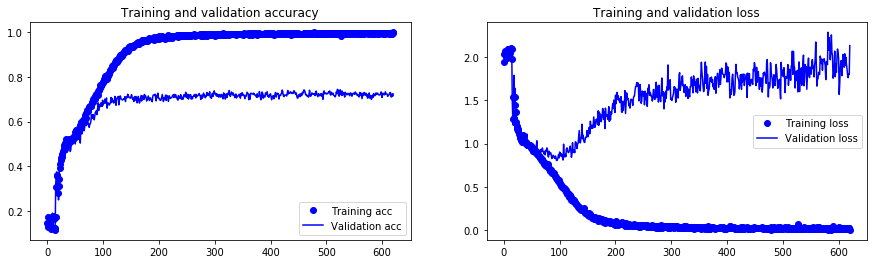

Test acc: 77.729 Val acc: 74.407 (At iteration 520) final training acc: 99.927

--------------------- Cross_subject_mini ---------------------------------------------


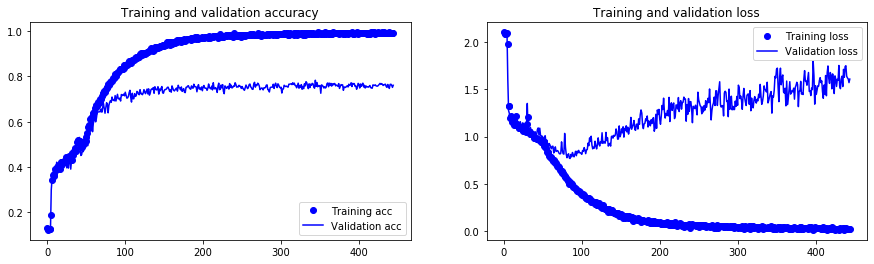

Test acc: 66.757 Val acc: 78.346 (At iteration 344) final training acc: 99.563

##################### det-3L-cuda-HU_155-remove0-DIST_REL-norm - 72.205 ######################
--------------------- Cross_view_mini ---------------------------------------------


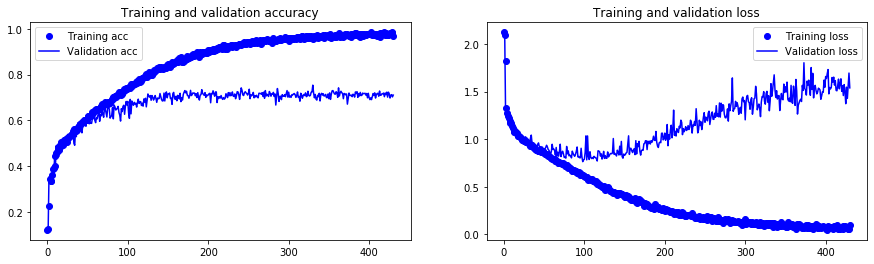

Test acc: 79.826 Val acc: 75.395 (At iteration 330) final training acc: 98.535

--------------------- Cross_subject_mini ---------------------------------------------


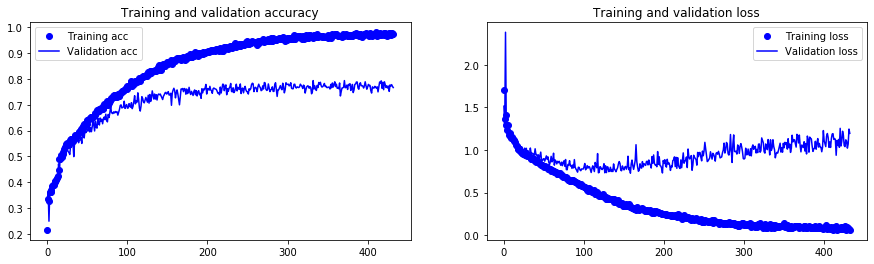

Test acc: 64.583 Val acc: 79.368 (At iteration 332) final training acc: 98.093

##################### det-3L-cuda-HU_155-remove0-3BAR-norm-reg-1e-06 - 71.518 ######################
--------------------- Cross_view_mini ---------------------------------------------


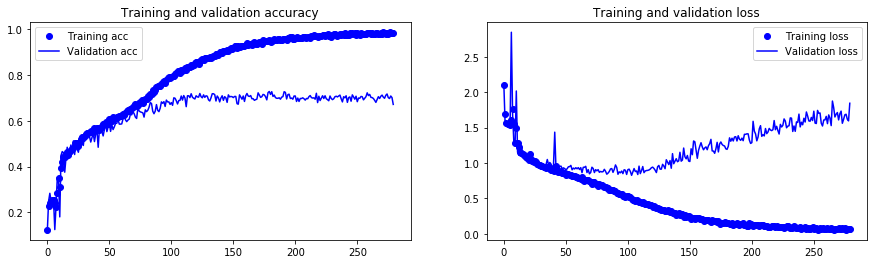

Test acc: 75.237 Val acc: 72.727 (At iteration 179) final training acc: 98.535

--------------------- Cross_subject_mini ---------------------------------------------


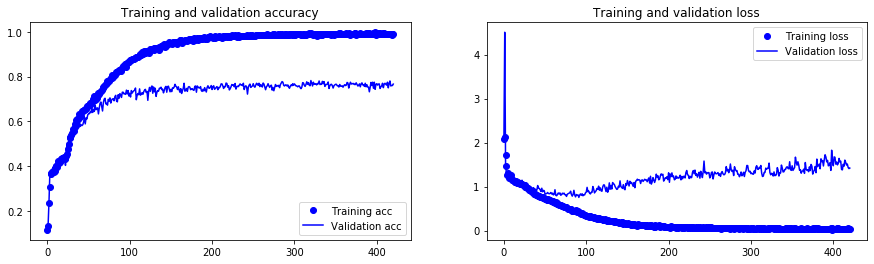

Test acc: 67.799 Val acc: 78.253 (At iteration 320) final training acc: 99.793

##################### det-3L-cuda-HU_155-remove0-VIDEO-norm - 71.300 ######################
--------------------- Cross_view_mini ---------------------------------------------


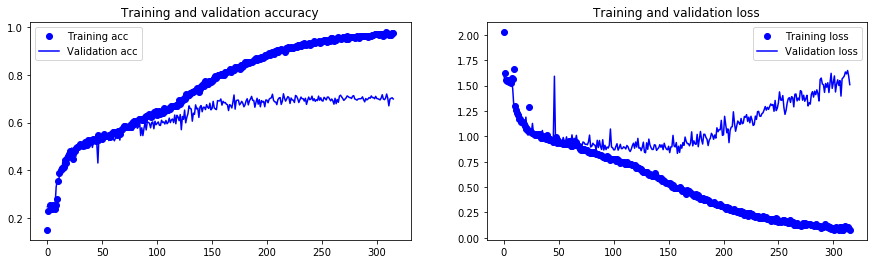

Test acc: 75.119 Val acc: 72.036 (At iteration 215) final training acc: 97.778

--------------------- Cross_subject_mini ---------------------------------------------


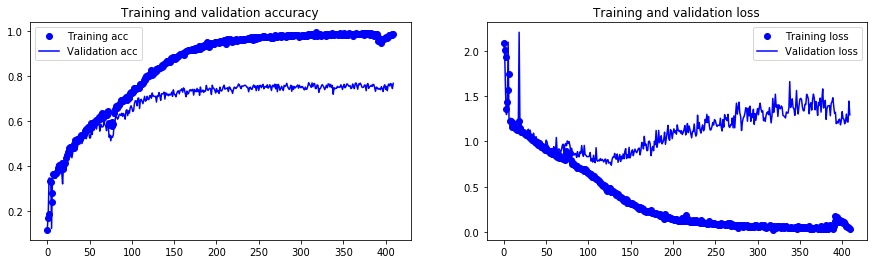

Test acc: 67.482 Val acc: 77.045 (At iteration 309) final training acc: 99.426

##################### det-3L-cuda-HU_155-remove0-FRAME-norm - 71.258 ######################
--------------------- Cross_view_mini ---------------------------------------------


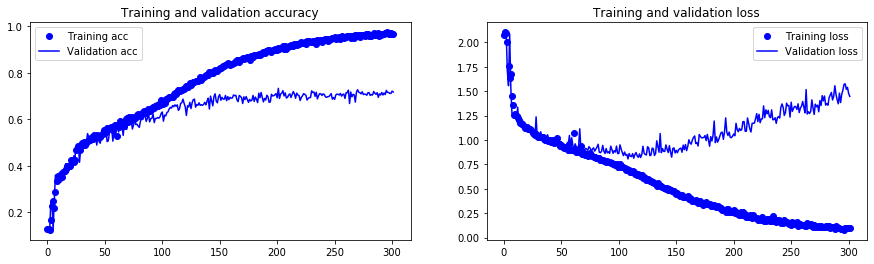

Test acc: 74.763 Val acc: 73.320 (At iteration 201) final training acc: 97.461

--------------------- Cross_subject_mini ---------------------------------------------


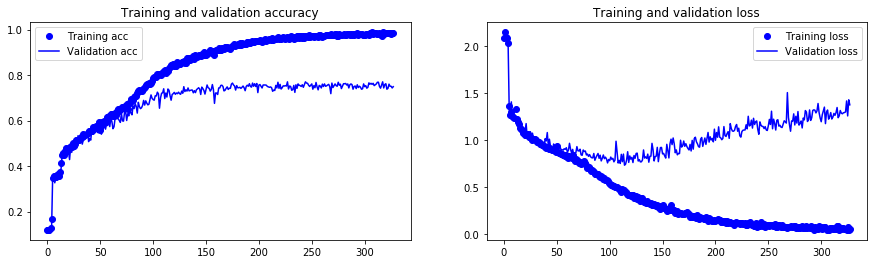

Test acc: 67.754 Val acc: 77.045 (At iteration 227) final training acc: 98.851



In [3]:
import matplotlib.pyplot as plt 
import pickle
from os import scandir
import numpy as np
from os.path import basename #, exists
from parse import parse

SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/" 

################ FROM PREVIOUS GLOBAL RESULT ################
for result in globalResults[:5]:
    print("##################### {} - {:.3f} ######################".format(cleanForExcel(result["model_name"]),result["avg"]*100))
    
    
#     folder_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb" #Setup-Camera-Performer-Replication-Action
#     def getConfigurationFromFolderPath(folderPath):
#     setup, camera, performer, replication, label = parse.parse(folder_name_format,basename(folderPath))
    
    foldersToShow = [parse("{}_test_acc",f) for f in list(result.keys()) if parse("{}_test_acc",f) != None]
    for folder in foldersToShow:
        folder = folder[0]
        
        if result[folder+"_test_acc"] == 0:
            continue
            
        print("---------------------",folder,"---------------------------------------------")
            
        historyPath = SAVED_MODEL_FOLDER+folder+"/"+result["model_name"]+".pickle"
        with open(historyPath,"rb") as file_in:
            r = pickle.load(file_in)

        model_history = r["history"]

        acc = model_history.history['accuracy']
        val_acc = model_history.history['val_accuracy']
        loss = model_history.history['loss']
        val_loss = model_history.history['val_loss']

        epochs = range(len(acc))

        plt.figure(figsize = (15,4))
        ax1 = plt.subplot(1, 2, 1)
        ax1.plot(epochs, acc, 'bo', label='Training acc')
        ax1.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        ax1.legend()

        #     plt.figure()
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(epochs, loss, 'bo', label='Training loss')
        ax2.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        ax2.legend()

        plt.show()
        test_acc = result[folder+"_test_acc"]*100
        max_val_acc = max(val_acc)*100
        i_val_acc = np.argmax(val_acc)
        training_acc = max(acc)*100
        print("Test acc: {:.3f} Val acc: {:.3f} (At iteration {}) final training acc: {:.3f}".format(test_acc,max_val_acc,i_val_acc,training_acc))
        if "loaded_from" in r.keys():
            print("Loaded from:", cleanForExcel(r["loaded_from"]))
        print("")

In [45]:
folder[0]

'Cross_view_mini'

In [25]:
list(globalResults[0].keys())[1:3]

['Cross_view_mini_test_acc', 'Cross_subject_mini_test_acc']

In [33]:
from parse import parse
result = globalResults[0]
[parse("{}_test_acc",f) for f in list(result.keys()) if parse("{}_test_acc",f) != None]
# [f for f in list(result.keys())[1:3]]

[<Result ('Cross_view_mini',) {}>, <Result ('Cross_subject_mini',) {}>]

In [11]:
historyPath

'/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-HU_880-removeZerosFromDataset-relativeToFrameCenter-normalizeVideos-drop-0-reg-0.pickle'

### Visualize missclassified

In [52]:
import seaborn as sn
def plotConfusionMatrixes(conf_mat_val, conf_mat_test, labelString = None):
    plt.figure(figsize = (25,35))
    ax1 = plt.subplot(2, 1, 1)
    ax1 = sn.heatmap(conf_mat_val, annot=True,xticklabels=labelString,yticklabels=labelString, fmt='g')
    plt.title("VALIDATION SET", fontsize = 20) # title with fontsize 20
    plt.xlabel('Pred', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('True', fontsize = 15) # y-axis label with fontsize 15
    
    ax2 = plt.subplot(2, 1, 2)
    
    ax2 = sn.heatmap(conf_mat_test, annot=True,xticklabels=labelString,yticklabels=labelString, fmt='g')
    plt.title("TEST SET", fontsize = 20) # title with fontsize 20
    plt.xlabel('Pred', fontsize = 15) # x-axis label with fontsize 15

    plt.show()

Val acc: 0.863792194092827
Test acc: 0.9035864978902953


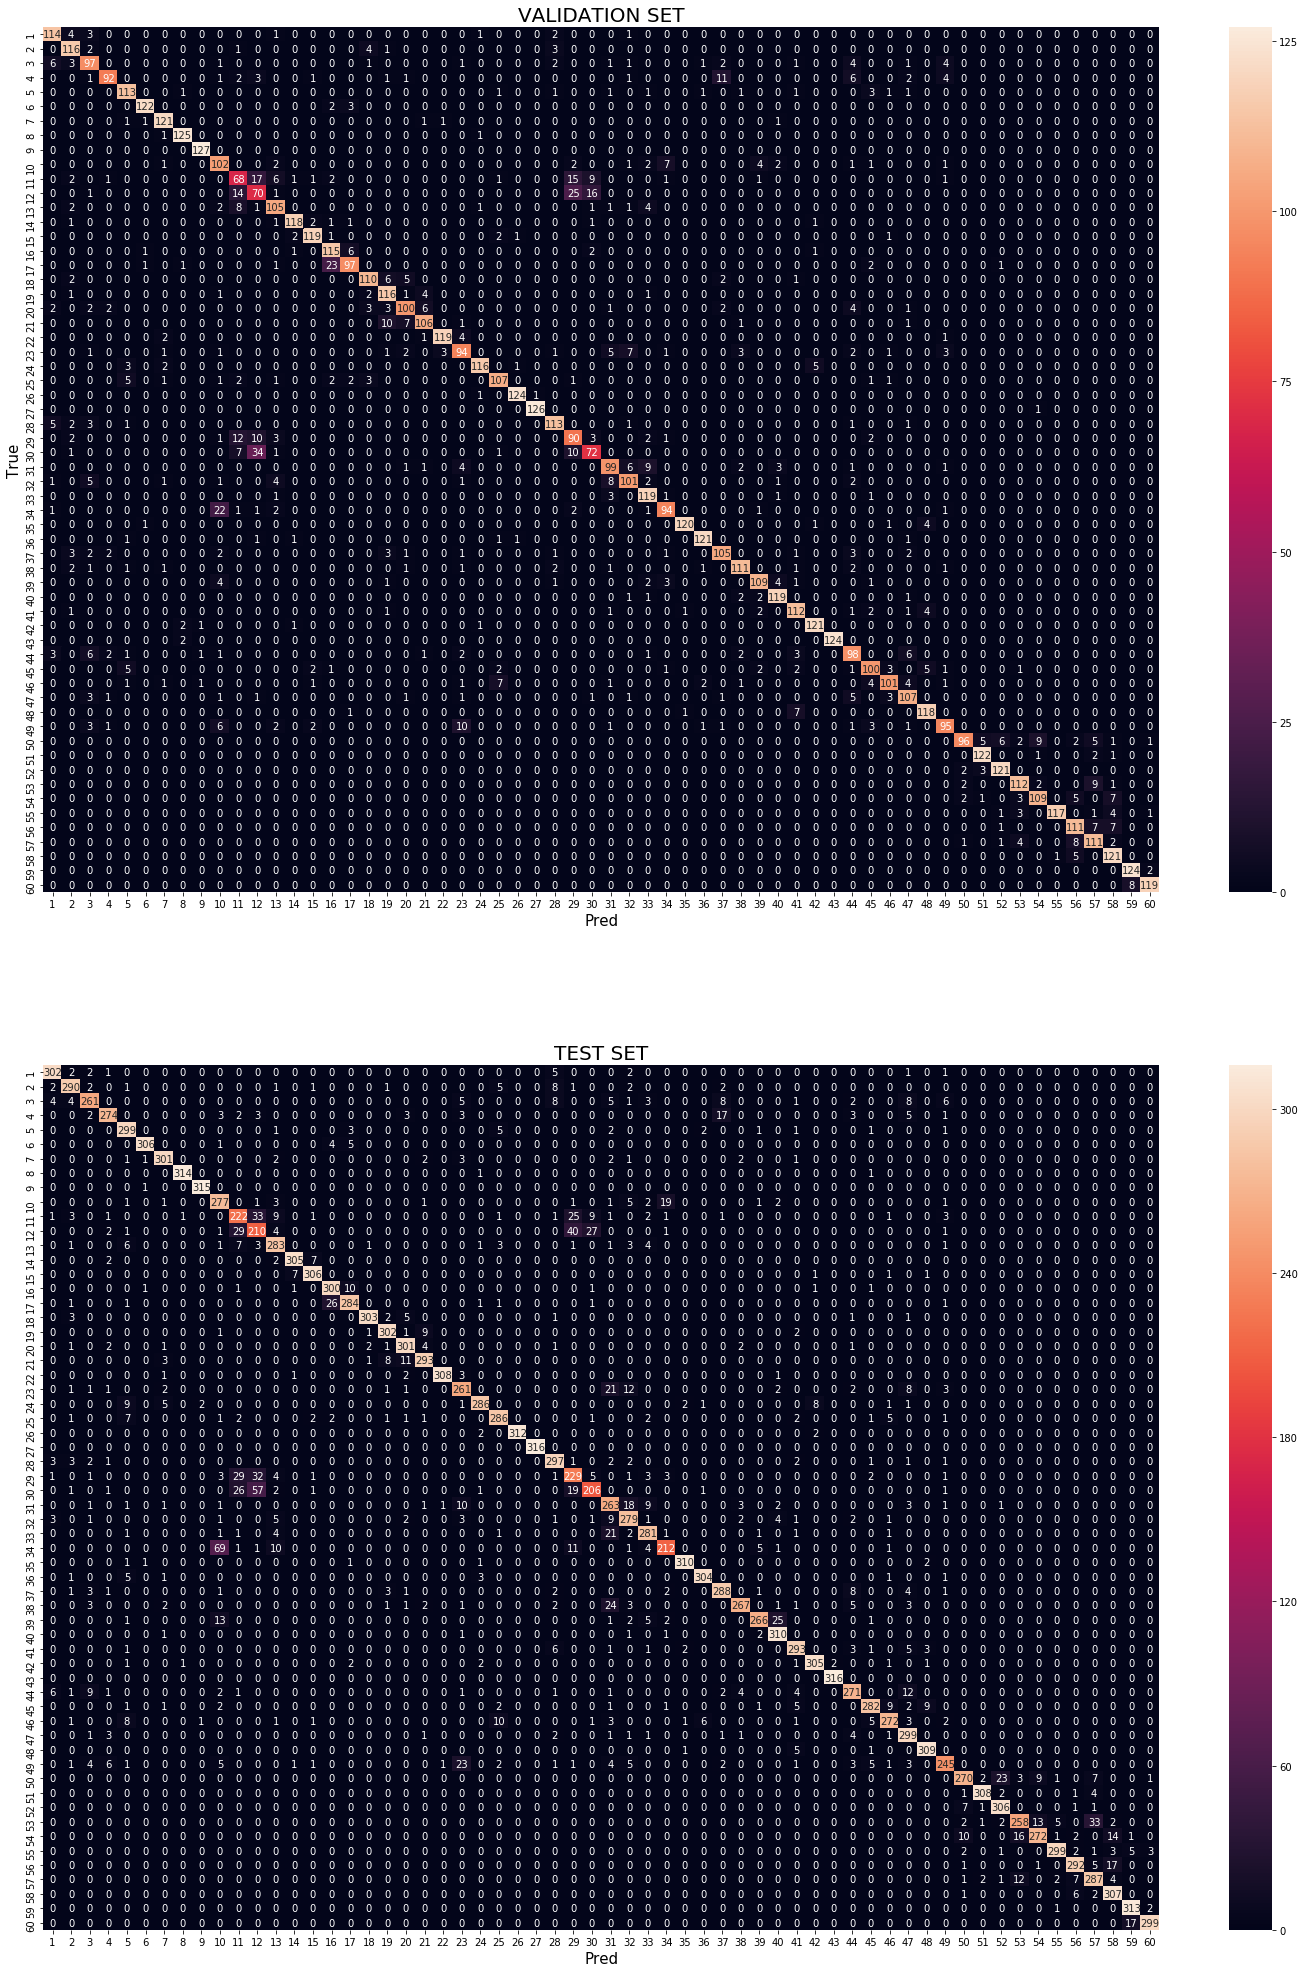

TEST PAIR CONFUSED:
 [[34, 10], [30, 12], [12, 29], [11, 12], [53, 57], [29, 12], [29, 11], [12, 11], [12, 30], [30, 11], [17, 16], [11, 29], [39, 40], [38, 31], [50, 52], [49, 23], [23, 31], [33, 31], [10, 34], [30, 29], [31, 32]]
TEST TOPIC CONFUSED:
 [34, 10, 30, 12, 29, 11, 53, 57, 17, 16, 39, 40, 38, 31, 50, 52, 49, 23, 33, 32]

VAL PAIR CONFUSED:
 [[30, 12], [12, 29], [17, 16], [34, 10], [11, 12], [12, 30], [11, 29], [12, 11], [29, 11], [4, 37], [29, 12], [21, 19], [49, 23], [30, 29], [11, 30], [50, 54], [53, 57], [31, 33], [13, 11], [60, 59], [57, 56]]
VAL TOPIC CONFUSED:
 [30, 12, 29, 17, 16, 34, 10, 11, 4, 37, 21, 19, 49, 23, 50, 54, 53, 57, 31, 33, 13, 60, 59, 56]

COMMON MOST CONFUSED:
 [[34, 10], [30, 12], [12, 29], [11, 12], [53, 57], [29, 12], [29, 11], [12, 11], [12, 30], [17, 16], [11, 29], [49, 23], [30, 29]]
COMMON TOPIC CONFUSED:
 [34, 10, 30, 12, 29, 11, 53, 57, 17, 16, 49, 23]
lenght: 12


In [54]:
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# label_order = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
#                '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
#                '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 
#                '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 
#                '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', 
#                '6', '60', '7', '8', '9']


SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
# SAVED_MODEL_FOLDER += "Senesi/"
# SAVED_MODEL_FOLDER += "top-models/"
# SAVED_MODEL_FOLDER += "top+Senesi_Cross_view/"
# SAVED_MODEL_FOLDER += "top+Senesi_Cross_subject/"
# SAVED_MODEL_FOLDER += "Cross_view_mini/"  
# SAVED_MODEL_FOLDER += "Cross_subject_mini/" 
SAVED_MODEL_FOLDER += "Cross_view/"  
# SAVED_MODEL_FOLDER += "Cross_subject/"

with open(SAVED_MODEL_FOLDER+"summaryResults.pickle","rb") as handle:
        loadedResults = pickle.load(handle)

loadedResults.sort(key=lambda x : x["test_acc"],reverse=True)
result = loadedResults[0]

y_val_pred = result["y_val_pred"]
y_val_true = result["y_val_true"]
y_test_pred = result["y_test_pred"]
y_test_true = result["y_test_true"]
val_acc = result["val_acc"]
test_acc = result["test_acc"]
print("Val acc:",val_acc)
print("Test acc:",test_acc)

# import pandas as pd
# y_actu_val = pd.Series(y_val_true, name='Actual')
# y_pred_val = pd.Series(y_val_pred, name='Predicted')
# conf_mat_val = pd.crosstab(y_actu_val, y_pred_val, rownames=['Actual'], colnames=['Predicted']
# #                            , margins=True
#                           )

# y_actu_test = pd.Series(y_test_true, name='Actual')
# y_pred_test = pd.Series(y_test_pred, name='Predicted')
# conf_mat_test = pd.crosstab(y_actu_test, y_pred_test, rownames=['Actual'], colnames=['Predicted']
# #                             , margins=True
#                            )

conf_mat_val= confusion_matrix(y_true=y_val_true, y_pred=y_val_pred)            
conf_mat_test = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred)

# # normalize
# conf_mat_val = conf_mat_val / conf_mat_val.sum(axis=1)
# conf_mat_test = conf_mat_test / conf_mat_test.sum(axis=1)

labels = range(1,len(conf_mat_val[0])+1)
plotConfusionMatrixes(conf_mat_val,conf_mat_test,labelString=labels)

length = len(conf_mat_test)

till = 21
mat_test = conf_mat_test.copy()
np.fill_diagonal(mat_test, 0)
np.argsort(mat_test.ravel())[::-1]
test_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_test.ravel())[::-1]]
print("TEST PAIR CONFUSED:\n", test_indexs[:till])
print("TEST TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(test_indexs[:till])))) # remove duplicates


mat_val = conf_mat_val.copy()
np.fill_diagonal(mat_val, 0)
np.argsort(mat_val.ravel())[::-1]
val_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_val.ravel())[::-1]]
print("\nVAL PAIR CONFUSED:\n", val_indexs[:till])
print("VAL TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(val_indexs[:till])))) # remove duplicates

commonPairs = [test_indexs[r] for r in range(till) if test_indexs[r] in val_indexs[:till]]
print("\nCOMMON MOST CONFUSED:\n", commonPairs)
commonTopic = list(dict.fromkeys(np.concatenate(commonPairs)))
print("COMMON TOPIC CONFUSED:\n", commonTopic)

print("lenght:" , len(commonTopic))


In [13]:
#CROSS_SUBJECT
till = 21
mat_test = conf_mat_test.copy()
np.fill_diagonal(mat_test, 0)
np.argsort(mat_test.ravel())[::-1]
test_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_test.ravel())[::-1]]
print("TEST PAIR CONFUSED:\n", test_indexs[:till])
print("TEST TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(test_indexs[:till])))) # remove duplicates


mat_val = conf_mat_val.copy()
np.fill_diagonal(mat_val, 0)
np.argsort(mat_val.ravel())[::-1]
val_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_val.ravel())[::-1]]
print("\nVAL PAIR CONFUSED:\n", val_indexs[:till])
print("VAL TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(val_indexs[:till])))) # remove duplicates

commonPairs = [test_indexs[r] for r in range(till) if test_indexs[r] in val_indexs[:till]]
print("\nCOMMON MOST CONFUSED:\n", commonPairs)
commonTopic = list(dict.fromkeys(np.concatenate(commonPairs)))
print("COMMON TOPIC CONFUSED:\n", commonTopic)

print("lenght:" , len(commonTopic))


TEST PAIR CONFUSED:
 [[12, 30], [10, 34], [11, 12], [29, 12], [31, 32], [11, 29], [17, 16], [16, 17], [34, 10], [29, 30], [12, 29], [11, 30], [30, 12], [29, 11], [39, 10], [53, 57], [31, 23], [46, 45], [1, 3], [52, 50], [15, 14]]
TEST TOPIC CONFUSED:
 [12, 30, 10, 34, 11, 29, 31, 32, 17, 16, 39, 53, 57, 23, 46, 45, 1, 3, 52, 50, 15, 14]

VAL PAIR CONFUSED:
 [[12, 30], [11, 12], [34, 10], [32, 23], [29, 12], [30, 12], [12, 29], [11, 29], [58, 56], [21, 19], [12, 11], [31, 32], [10, 34], [53, 57], [31, 23], [50, 51], [32, 31], [13, 5], [54, 58], [4, 37], [17, 16]]
VAL TOPIC CONFUSED:
 [12, 30, 11, 34, 10, 32, 23, 29, 58, 56, 21, 19, 31, 53, 57, 50, 51, 13, 5, 54, 4, 37, 17, 16]

COMMON MOST CONFUSED:
 [[12, 30], [10, 34], [11, 12], [29, 12], [31, 32], [11, 29], [17, 16], [34, 10], [12, 29], [30, 12], [53, 57], [31, 23]]
COMMON TOPIC CONFUSED:
 [12, 30, 10, 34, 11, 29, 31, 32, 17, 16, 53, 57, 23]
lenght: 13


In [11]:
#CROSS_VIEW
till = 21
mat_test = conf_mat_test.copy()
np.fill_diagonal(mat_test, 0)
np.argsort(mat_test.ravel())[::-1]
test_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_test.ravel())[::-1]]
print("TEST PAIR CONFUSED:\n", test_indexs[:till])
print("TEST TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(test_indexs[:till])))) # remove duplicates


mat_val = conf_mat_val.copy()
np.fill_diagonal(mat_val, 0)
np.argsort(mat_val.ravel())[::-1]
val_indexs = [[int(elem/length)+1,elem%length+1] for elem in np.argsort(mat_val.ravel())[::-1]]
print("\nVAL PAIR CONFUSED:\n", val_indexs[:till])
print("VAL TOPIC CONFUSED:\n", list(dict.fromkeys(np.concatenate(val_indexs[:till])))) # remove duplicates

commonPairs = [test_indexs[r] for r in range(till) if test_indexs[r] in val_indexs[:till]]
print("\nCOMMON MOST CONFUSED:\n", commonPairs)
commonTopic = list(dict.fromkeys(np.concatenate(commonPairs)))
print("COMMON TOPIC CONFUSED:\n", commonTopic)

print("lenght:" , len(commonTopic))


TEST PAIR CONFUSED:
 [[34, 10], [30, 12], [12, 29], [11, 12], [53, 57], [29, 12], [29, 11], [12, 11], [12, 30], [30, 11], [17, 16], [11, 29], [39, 40], [38, 31], [50, 52], [49, 23], [23, 31], [33, 31], [10, 34], [30, 29], [31, 32]]
TEST TOPIC CONFUSED:
 [34, 10, 30, 12, 29, 11, 53, 57, 17, 16, 39, 40, 38, 31, 50, 52, 49, 23, 33, 32]

VAL PAIR CONFUSED:
 [[30, 12], [12, 29], [17, 16], [34, 10], [11, 12], [12, 30], [11, 29], [12, 11], [29, 11], [4, 37], [29, 12], [21, 19], [49, 23], [30, 29], [11, 30], [50, 54], [53, 57], [31, 33], [13, 11], [60, 59], [57, 56]]
VAL TOPIC CONFUSED:
 [30, 12, 29, 17, 16, 34, 10, 11, 4, 37, 21, 19, 49, 23, 50, 54, 53, 57, 31, 33, 13, 60, 59, 56]

COMMON MOST CONFUSED:
 [[34, 10], [30, 12], [12, 29], [11, 12], [53, 57], [29, 12], [29, 11], [12, 11], [12, 30], [17, 16], [11, 29], [49, 23], [30, 29]]
COMMON TOPIC CONFUSED:
 [34, 10, 30, 12, 29, 11, 53, 57, 17, 16, 49, 23]
lenght: 12


In [14]:
view = [34, 10, 30, 12, 29, 11, 53, 57, 17, 16, 49, 23] # toughest cross_view
subj = [12, 30, 10, 34, 11, 29, 31, 32, 17, 16, 53, 57] # toughest cross_subject
subj.sort()
view.sort()
print("subj =", subj)
print("view =", view)

subj = [10, 11, 12, 16, 17, 29, 30, 31, 32, 34, 53, 57]
view = [10, 11, 12, 16, 17, 23, 29, 30, 34, 49, 53, 57]


## Re-evaluating model

In [41]:
import dill
import pickle
import numpy as np
from keras import models,layers
from keras.layers import LSTM, CuDNNLSTM, Dropout, Concatenate , Dense
from keras.models import Model,load_model
from keras.regularizers import l2 #, l1
from keras.callbacks import EarlyStopping,ModelCheckpoint
import random
from os import scandir
from os.path import exists
import shutil 

DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"

MODEL_NAME = "keypoint_rcnn_X_101_32x8d_FPN_3x"
fullModelNameToEvaluate = "keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-HU_128-removeZerosFromDataset-relativeToVideoCenter-normalizeVideos-drop-0-reg-0"

# folder_to_evaluate = "Cross_view/"  
folder_to_evaluate = "Cross_view_mini/"  
# folder_to_evaluate = "Cross_subject/"

completeFolderPath = SAVED_MODEL_FOLDER+folder_to_evaluate


assert exists(completeFolderPath+"summaryResults-Copy1.pickle")
print("Loading previous results...")
with open(completeFolderPath+"summaryResults-Copy1.pickle","rb") as handle:
    results = pickle.load(handle)

# results.sort(key=lambda x : x["test_acc"],reverse=True)

accessoriesPath = completeFolderPath+fullModelNameToEvaluate+".pickle"

print("Loading accessories:",accessoriesPath)
with open(accessoriesPath,"rb") as handle:
    accessories = pickle.load(handle)
            
print("Loading functions...")
loaded_specific_functions = [dill.loads(x) for x in accessories["spec_fun_DILL"]]

## SPECIFIC FUNCTIONS
specificFunctions = []
for elem in loaded_specific_functions:
    if callable(elem):
        specificFunctions.append(elem)
    elif not callable(elem):
        specificFunctions.append(elem[0])
                

if folder_to_evaluate.endswith("Cross_subject/"):
    datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT-dataset.pickle"           
elif folder_to_evaluate.endswith("Cross_view/"):
    datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW-dataset.pickle"
if folder_to_evaluate.endswith("Cross_subject_mini/"):
    datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_SUBJECT_MINI-dataset.pickle"           
elif folder_to_evaluate.endswith("Cross_view_mini/"):
    datasetName = DATASET_FOLDER+MODEL_NAME+"-CROSS_VIEW_MINI-dataset.pickle"
else:
    raise Exception("folder not recognised")
    
### LOADING DATASET ###
print("#### Loading dataset: ", datasetName)
train_set, val_set, test_set = getData(datasetName)

X_train, y_train, X_val, y_val, X_test, y_test, encodingLabels = preprocessData(train_set, 
                                                                               val_set, 
                                                                               test_set,  
                                                                               specificFunctions)
encodingLabels = [int(i) for i in encodingLabels]

model = load_model(completeFolderPath+fullModelNameToEvaluate+".h5")
### EVALUATING MODEL ###      
val_acc, test_acc, y_val_true, y_val_pred, y_test_true, y_test_pred = getValTestAccuracy(model,X_val,y_val,X_test,y_test, encodingLabels)
print("Model for MAX ACCURACY test_acc: {:.3f} val_acc: {:.3f}".format(test_acc*100,val_acc*100))


minLossModelName = "{}-min_val_loss.hdf5".format(completeFolderPath+fullModelNameToEvaluate)
model_minLoss = load_model(minLossModelName)
val_acc_minLoss, test_acc_minLoss, y_val_true, y_val_pred_minLoss, y_test_true, y_test_pred_minLoss = getValTestAccuracy(model_minLoss,X_val,y_val,X_test,y_test,encodingLabels)
print("Model for MIN LOSS test_acc: {:.3f} val_acc: {:.3f}".format(test_acc_minLoss*100,val_acc_minLoss*100))

### SAVING RESULTS ###
newEvaluation = {"val_acc": val_acc, 
                "test_acc": test_acc, 
                "model_name": fullModelNameToEvaluate, 
                "y_val_true": y_val_true,
                "y_val_pred": y_val_pred,
                "y_test_true": y_test_true,
                "y_test_pred": y_test_pred,

                "val_acc_minLoss": val_acc_minLoss, 
                "test_acc_minLoss": test_acc_minLoss, 
                "y_val_pred_minLoss": y_val_pred_minLoss,
                "y_test_pred_minLoss": y_test_pred_minLoss
               }

previousResult = [v for v in results
     if v["model_name"] == fullModelNameToEvaluate]
isPreviousResult = np.array(results) == previousResult
indexPreviousResult = np.array(range(len(results)))[isPreviousResult]
if len(indexPreviousResult) == 0:
    print("model evaluated for the first time")
    results.append(newEvaluation)
else:
    print("substituting evaluation for the model")
    results[indexPreviousResult[0]] = newEvaluation



print("Dumping results...")
with open(completeFolderPath+"summaryResults.pickle","wb") as handle:
    pickle.dump(results, handle)

print("DONE!")


Loading previous results...
Loading accessories: /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-HU_128-removeZerosFromDataset-relativeToVideoCenter-normalizeVideos-drop-0-reg-0.pickle
Loading functions...
#### Loading dataset:  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW_MINI-dataset.pickle
train_set shape: (4044,)
train_set zero elements: 20332/16346622 (0.12%)
val_set shape: (1012,)
val_set zero elements: 2618/4066196 (0.064%)
test_set shape: (2528,)
test_set zero elements: 11390/10189664 (0.11%)
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
classes order: ['10' '11' '12' '29' '30' '34' '53' '57']
removing zeros from dataset
removing zeros from dataset
removing zeros from dataset
Adapting the data to the CENTER of each VIDEO
Adapting the data to the CENTER of each VIDEO
Ada

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/ipykernel_launcher.py:101: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


### Visualize nextFrameResults

In [32]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

model_name = "keypoint_rcnn_X_101_32x8d_FPN_3x"
# model_name = "PoseNet-101"
datasetName = DATASET_FOLDER+model_name+"-CROSS_SUBJECT_MINI-dataset.pickle"

train_set, val_set, test_set = getData(datasetName)

train_set[0] = removeZerosFromDataset(train_set[0])
# train_set[0] = relativeToNextFrameBuilder(11)(train_set[0])
# train_set[0] = relativeToUpperMiddleBottomCentersOfVideo(train_set[0])
train_set[0] = cumulativeDifferences(train_set[0])
# train_set[0] = normalizeVideosXYInpid(train_set[0])
train_set[0] = normalizeVideos(train_set[0])

# val_set[0] = removeZerosFromDataset(val_set[0])
# test_set[0] = removeZerosFromDataset(test_set[0])

# labels = ["train_set", "val_set", "test_set"]
# for i,dataset in enumerate([train_set, val_set, test_set]):
#     totalsize, zero_elements =  getZeroStatsForDataset(dataset[0])
#     print("{} shape: {}".format(labels[i], dataset[0].shape))
#     print("{} zero elements: {}/{} ({:.2}%)".format(labels[i],zero_elements,totalsize,zero_elements*100/totalsize))
        
print("DONE!")

train_set shape: (6451,)
train_set zero elements: 18496/19641018 (0.094%)
val_set shape: (1613,)
val_set zero elements: 6358/4906268 (0.13%)
test_set shape: (3312,)
test_set zero elements: 5032/10836820 (0.046%)
removing zeros from dataset
Adapting the data as the CUMULATIVE DIFFERENCES of consecutive frames
normalising EACH VIDEO, considering x and y TOGETHER
DONE!


In [34]:
from random import randint
video_ids = [randint(0,len(train_set[0])) for i in range(15)]

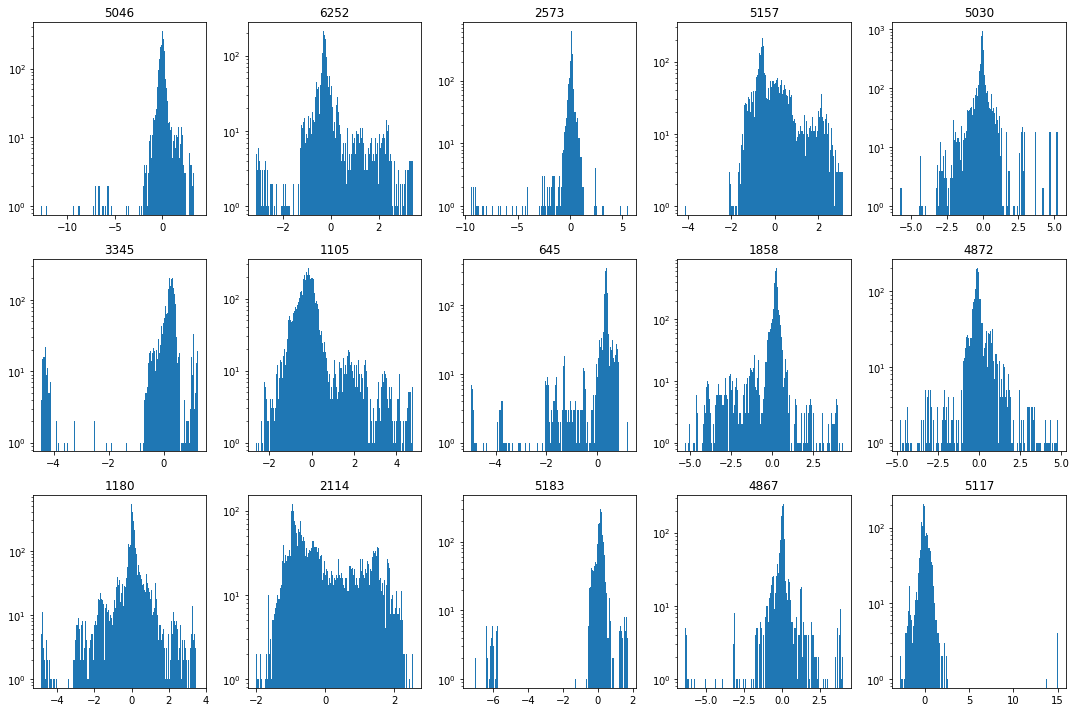

In [35]:
# CUMULATIVE DIFFERENCES
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

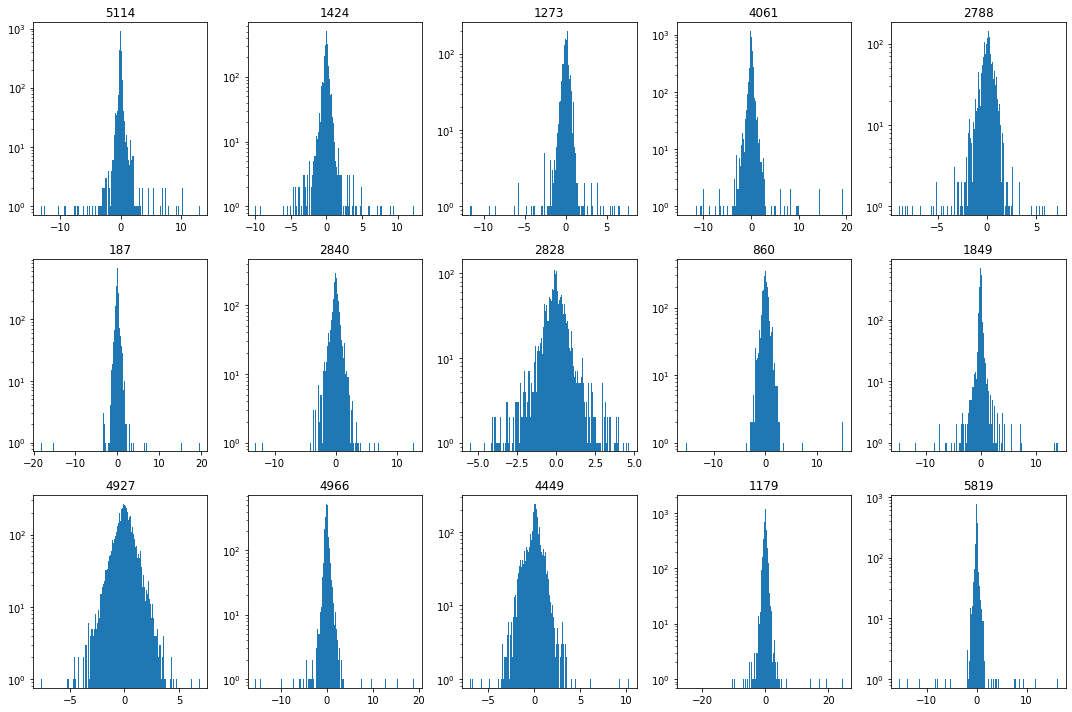

In [255]:
# NEXT FRAME
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

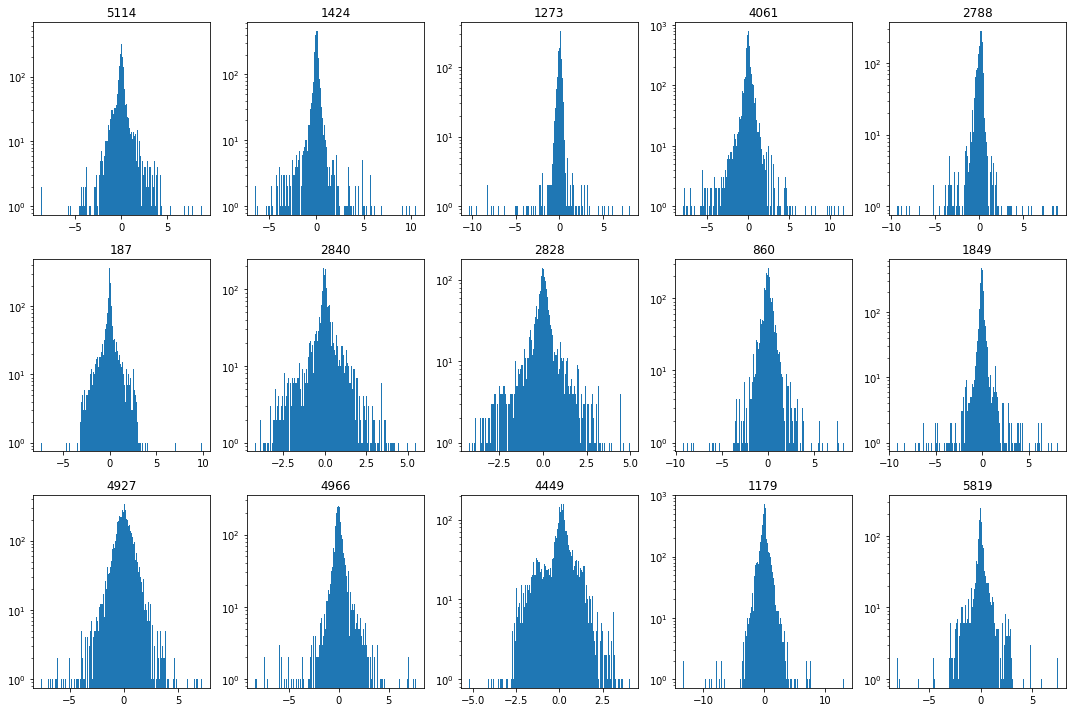

In [259]:
# NEXT 5 FRAME
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

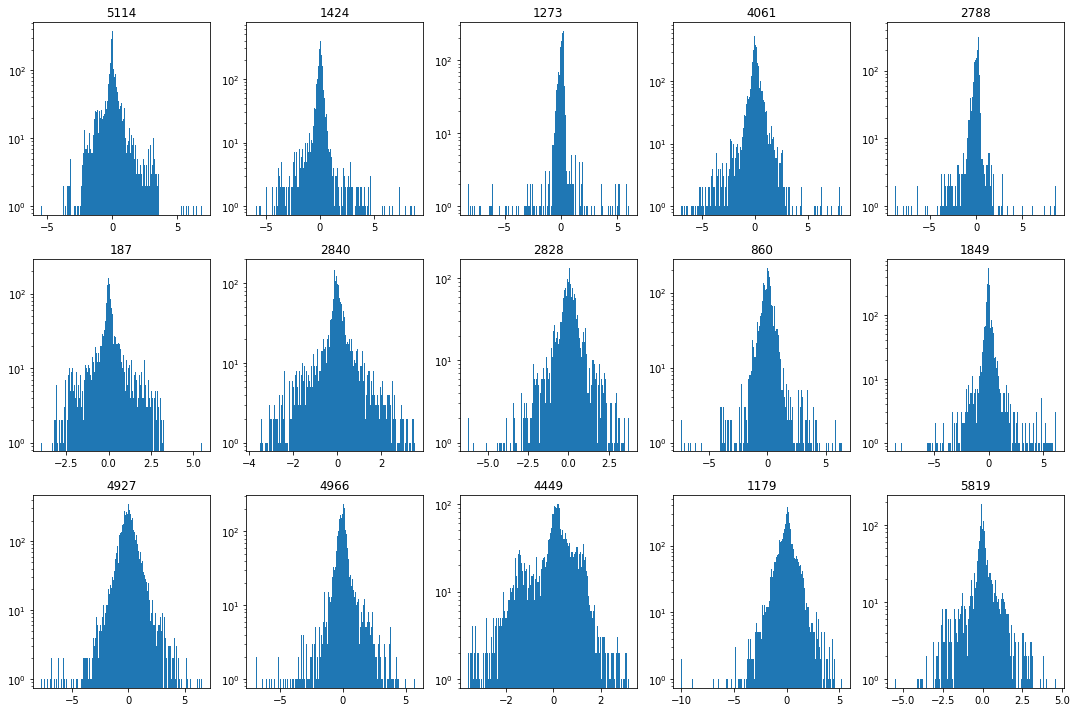

In [261]:
# NEXT 11 FRAME nomalizing INDIPENDENTLY
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

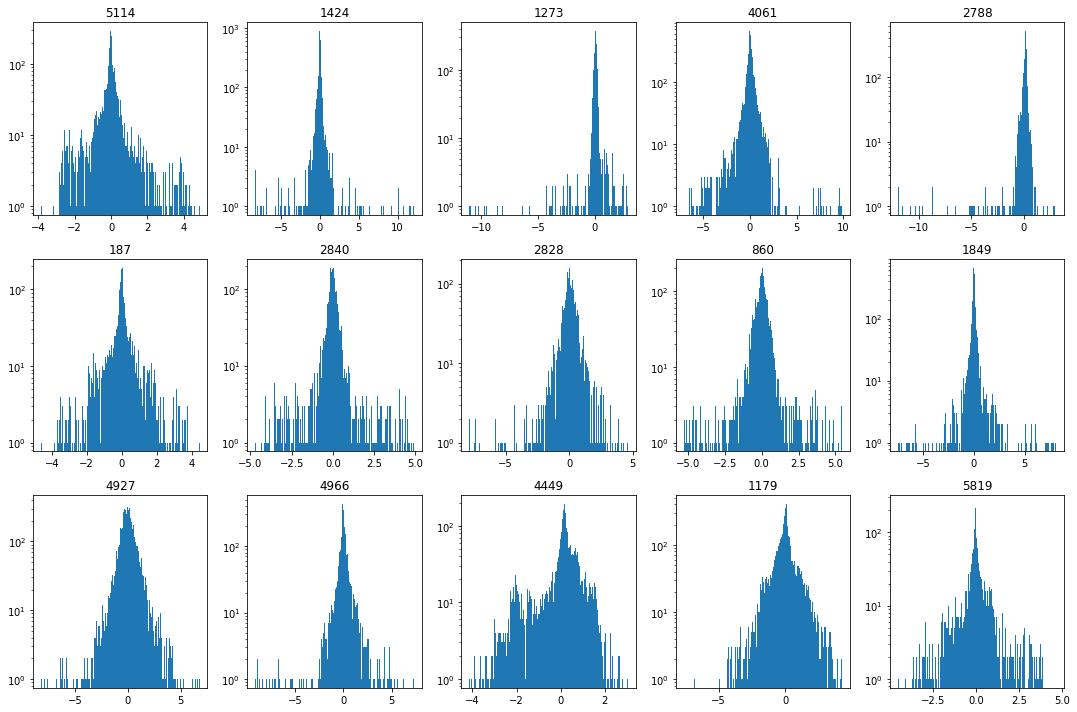

In [267]:
# NEXT 11 FRAME nomalizing TOGETHER
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

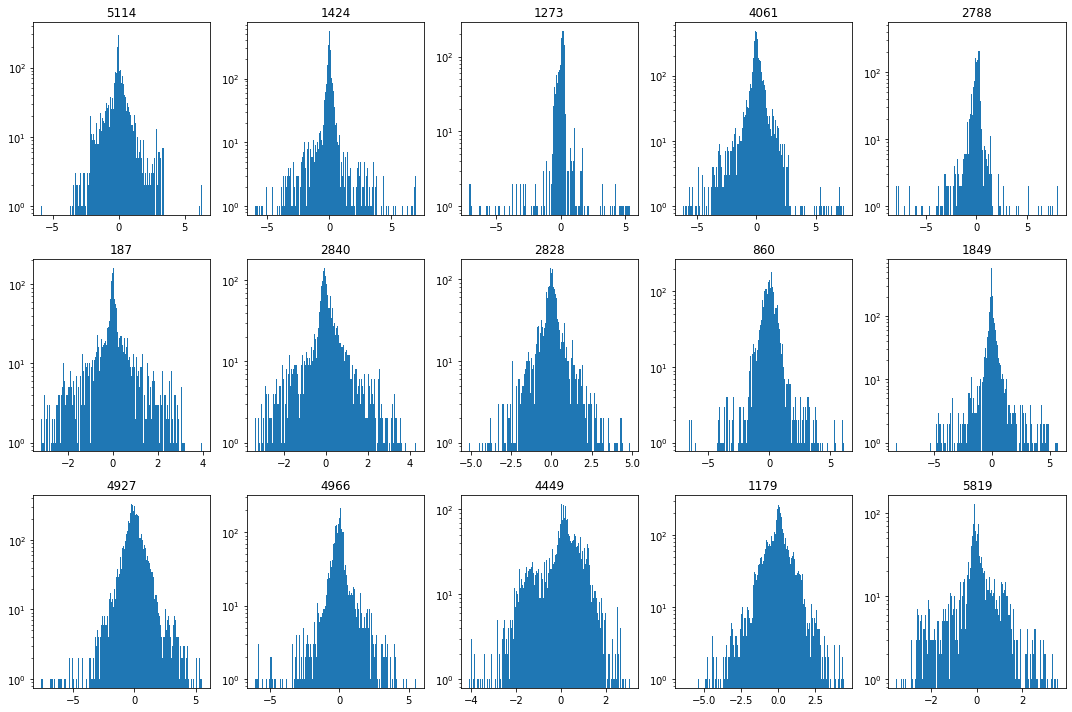

In [263]:
# NEXT 15 FRAME
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

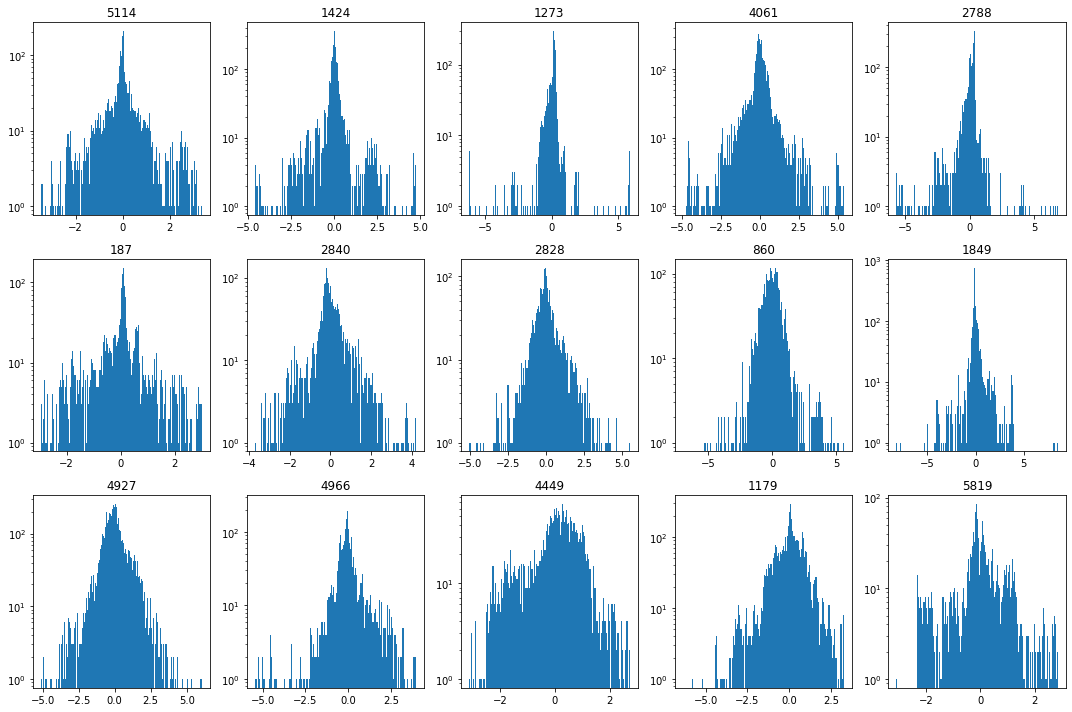

In [265]:
# NEXT 30 FRAME
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

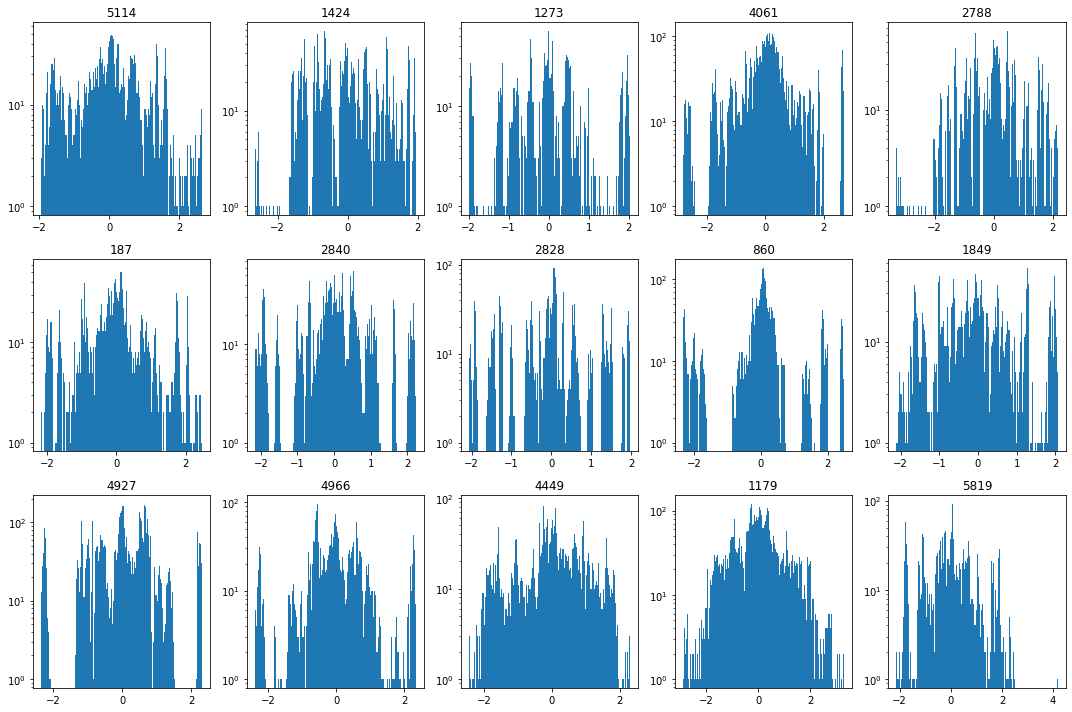

In [277]:
# 3BAR
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

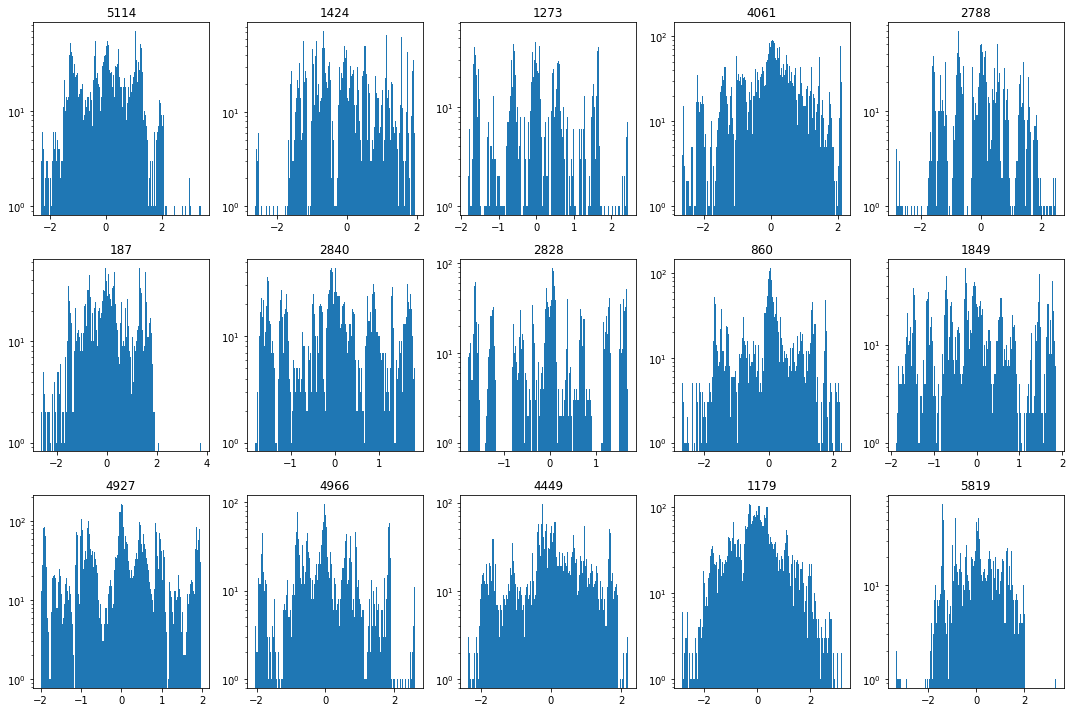

In [275]:
# 3BAR INDIP
import matplotlib.pyplot as plt
from random import randint


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
counter = 0
for axes_row in axes:
    for ax in axes_row:
#         video_idx = randint(0,len(train_set[0]))
        video_idx = video_ids[counter]
        counter += 1
        videoToVisualize = train_set[0][video_idx]
        y = videoToVisualize.flatten()
        ax.hist(y, bins=200)
        ax.set_title(video_idx)
        ax.set_yscale('log')
fig.tight_layout()
plt.show()

## CLEAN Results

In [112]:
#remove last element of summary result

SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
# SAVED_MODEL_FOLDER += "Senesi/"
# SAVED_MODEL_FOLDER += "top-models/"
# SAVED_MODEL_FOLDER += "Cross_view/"
SAVED_MODEL_FOLDER += "Cross_subject/"

with open(SAVED_MODEL_FOLDER+"summaryResults.pickle","rb") as handle:
        loadedResults = pickle.load(handle)

print("Removing",loadedResults[-1]['model_name'])
print ("From",SAVED_MODEL_FOLDER+"summaryResults.pickle")

# loadedResults = loadedResults[:-1]
# with open(SAVED_MODEL_FOLDER+"summaryResults.pickle","wb") as handle:
#             pickle.dump(loadedResults, handle)

Removing keypoint_rcnn_X_101_32x8d_FPN_3x-2L-removeZerosFromDataset-relativeTo5CentersNTURGBofVideo-drop-0.1-rec_drop-0.1-norm
From /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Senesi/summaryResults.pickle


## Removing accessories file for low results

In [5]:
from os.path import isfile, isdir, join, exists,getsize,basename
from os import scandir
import pickle

NUMBER_OF_BEST_MODEL_TO_SAVE = 20

SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
# SAVED_MODEL_FOLDER += "Senesi/"
# SAVED_MODEL_FOLDER += "top-models/"
SAVED_MODEL_FOLDER += "Cross_view_mini/"
# SAVED_MODEL_FOLDER += "Cross_subject_mini/"


accessoryFileList = [f.path for f in scandir(SAVED_MODEL_FOLDER) 
                       if f.path.endswith(".pickle") 
                       and "summaryResult" not in basename(f)]

with open(SAVED_MODEL_FOLDER+"summaryResults.pickle","rb") as handle:
        loadedResults = pickle.load(handle)
        
loadedResults.sort(key=lambda x : x["test_acc"], reverse=True)
assert NUMBER_OF_BEST_MODEL_TO_SAVE > 10
bestModels = [r['model_name'] for r in loadedResults[:NUMBER_OF_BEST_MODEL_TO_SAVE]]

for accessoryFile in accessoryFileList:
    modelNameToCheck = basename(accessoryFile).replace(".pickle","")
    if modelNameToCheck not in bestModels:
        print("Removing",accessoryFile)
        !rm $accessoryFile

Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToNextFrame-normalizeVideos-drop-0.1-reg-0.001.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-normalizeVideosXYInpid-drop-0.5-reg-0.1.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToUpperMiddleBottomCentersOfVideo-normalizeVideos-drop-0.1-reg-0.001.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToNextFrame-normalizeVideos-drop-0.5-reg-0.001.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_

Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToUpperMiddleBottomCentersOfVideo-normalizeVideos-drop-0.1-reg-0.1.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-removeZerosFromDataset-relativeToNextFrame-normalizeVideos-drop-0.05-rec_drop-0.05.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-normalizeVideosXYInpid-drop-0-rec_drop-0.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-normalizeVideos-drop-0-rec_drop-0.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-

Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToUpperMiddleBottomCentersOfVideo-normalizeVideos-drop-0.1-reg-1.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-removeZerosFromDataset-normalizeVideos-drop-0.1-rec_drop-0.1.pickle
Removing /data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/Cross_view_mini/keypoint_rcnn_X_101_32x8d_FPN_3x-2L-CuDNNLSTM-removeZerosFromDataset-relativeToNextFrame-normalizeVideos-drop-0.1-reg-0.pickle


# AREA TEST

## Testing relativeToNextFrameFunction

## Smoothing test

In [35]:
MODEL_NAME = "PoseNet-101"
datasetName = DATASET_FOLDER+MODEL_NAME+"-SPLIT-dataset.pickle"
print("#### Loading dataset: ", datasetName)
train_set, val_set, test_set = getData(datasetName)

#### Loading dataset:  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-SPLIT-dataset.pickle
train_set shape: (5460,)
train_set zero elements: 58106/13984574 (0.42%)
val_set shape: (1365,)
val_set zero elements: 15980/3509310 (0.46%)
test_set shape: (759,)
test_set zero elements: 9588/1973564 (0.49%)


doing video 0
doing video 1


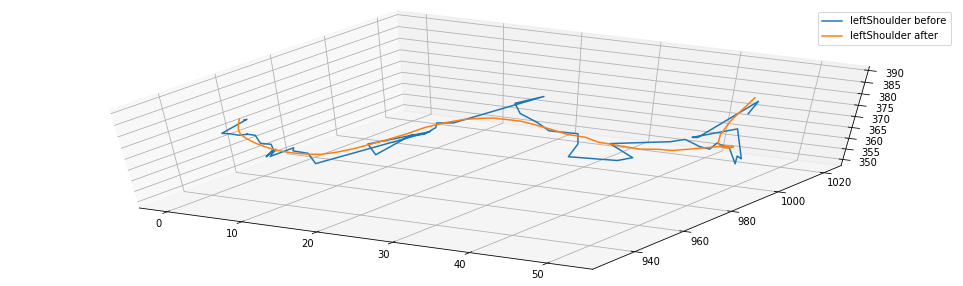

In [36]:
from pandas import Series #read_csv, ,date_range
# from pandas import DataFrame
# from pandas import Grouper
# from numpy import random
# from numpy.random import randn

from scipy import signal
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


legend = ["nose", "leftEye", "rightEye", "leftEar", "rightEar",
          "leftShoulder", "rightShoulder", "leftElbow", "rightElbow", "leftWrist", "rightWrist",
          "leftHip", "rightHip", "leftKnee", "rightKnee", "leftAnkle", "rightAnkle"]
window = 29
order = 5
# listOfPoints = list(range(17))
listOfPoints = [5
#                 ,7,9
               ]

fig = plt.figure()
fig.set_size_inches( (17, len(listOfPoints)*5) )
for i, p in enumerate(listOfPoints):
    
    ax = fig.add_subplot(len(listOfPoints), 1, i+1, projection='3d')
    
    ax.view_init(50, -60)
    x, y = zip(*[(f[p][0], f[p][1]) for f in train_set[0][0]])
    z = np.arange(len(x))
    ax.plot(z,y,x,label=legend[p]+" before")
    
    smoothingPoints(29,5)[0](train_set[0])
    
    x2, y2 = zip(*[(f[p][0], f[p][1]) for f in train_set[0][0]])
    z2 = np.arange(len(x))
    ax.plot(z2,y2,x2,label=legend[p]+" after")
    
    ax.legend()

plt.show()
  

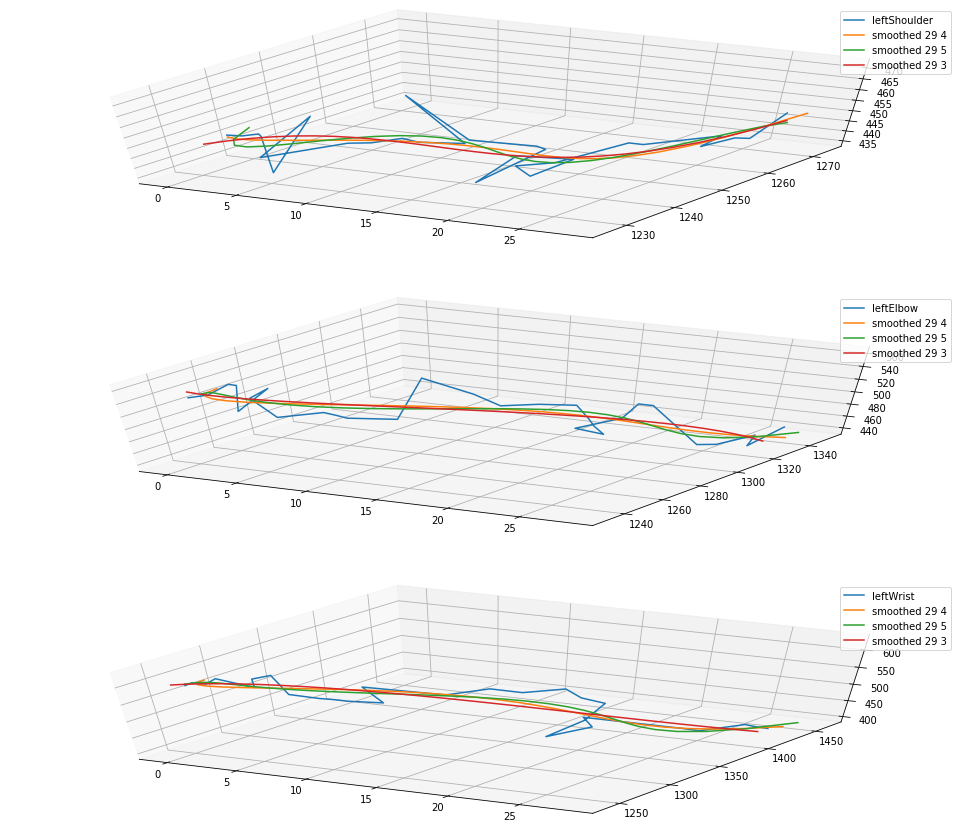

In [91]:
from pandas import Series #read_csv, ,date_range
# from pandas import DataFrame
# from pandas import Grouper
# from numpy import random
# from numpy.random import randn

from scipy import signal
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


legend = ["nose", "leftEye", "rightEye", "leftEar", "rightEar",
          "leftShoulder", "rightShoulder", "leftElbow", "rightElbow", "leftWrist", "rightWrist",
          "leftHip", "rightHip", "leftKnee", "rightKnee", "leftAnkle", "rightAnkle"]
window = 29
order = 5
# listOfPoints = list(range(17))
listOfPoints = [5
#                 ,7,9
               ]

fig = plt.figure()
fig.set_size_inches( (17, len(listOfPoints)*5) )
for i, p in enumerate(listOfPoints):
    
    ax = fig.add_subplot(len(listOfPoints), 1, i+1, projection='3d')
    
    ax.view_init(50, -60)
    x, y = zip(*[(f[p][0], f[p][1]) for f in randomVideo])
    z = np.arange(len(x))
    ax.plot(z,y,x,label=legend[p])
    
    smooth_y=signal.savgol_filter(y, window, order) 
    smooth_x=signal.savgol_filter(x, window, order)
    ax.plot(z,smooth_y,smooth_x,label="smoothed {} {}".format(window,order))
    
    
    ax.legend()

plt.show()
  

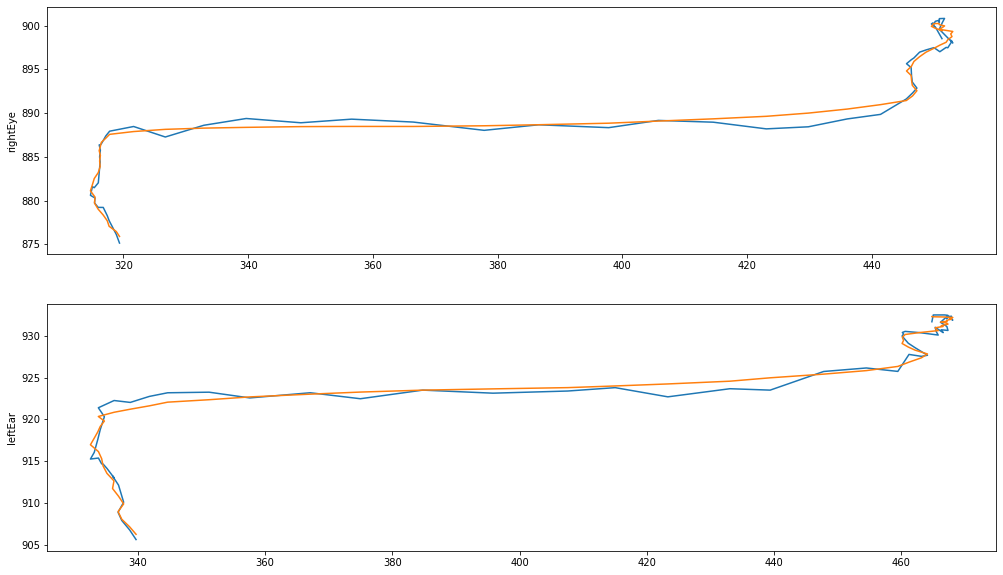

In [302]:
from pandas import Series #read_csv, ,date_range
# from pandas import DataFrame
# from pandas import Grouper
# from numpy import random
# from numpy.random import randn

from scipy import signal
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


legend = ["nose", "leftEye", "rightEye", "leftEar", "rightEar",
          "leftShoulder", "rightShoulder", "leftElbow", "rightElbow", "leftWrist", "rightWrist",
          "leftHip", "rightHip", "leftKnee", "rightKnee", "leftAnkle", "rightAnkle"]
listOfPoints = [2,3]
fig, axes = plt.subplots(nrows=len(listOfPoints), ncols=1)
fig.set_size_inches((17,len(listOfPoints)*5))
for i, p in enumerate(listOfPoints):
    axes[i].set_ylabel(legend[p])
    x, y = zip(*[(f[p][0], f[p][1]) for f in randomVideo])
    # series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    ts = Series(y, index=x)
    # ts = ts.cumsum()
    ts.plot(ax=axes[i])
    
    smooth_y=signal.savgol_filter(ts.get_values(),
                           29, # window size used for filtering
                           3), # order of fitted polynomial

    ts2 = Series(smooth_y[0], index=x)

    ts2.plot(ax=axes[i])

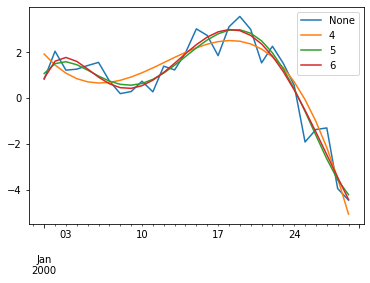

In [115]:
from pandas import read_csv, Series,date_range
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from numpy import random
from numpy.random import randn
from scipy import signal


# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
ts = Series(randn(29), index=date_range('1/1/2000', periods=29))
ts = ts.cumsum()
ts.plot()

y1=signal.savgol_filter(ts.get_values(),
                       29, # window size used for filtering
                       4) # order of fitted polynomial  
ts2 = Series(y1, index=date_range('1/1/2000', periods=29))
ts2.plot(label="4")


y2=signal.savgol_filter(ts.get_values(),
                       29, # window size used for filtering
                       5) # order of fitted polynomial
ts3 = Series(y2, index=date_range('1/1/2000', periods=29))
ts3.plot(label="5")


y3=signal.savgol_filter(ts.get_values(),
                       29, # window size used for filtering
                       6) # order of fitted polynomial
ts4 = Series(y3, index=date_range('1/1/2000', periods=29))

ts4.plot(label="6")
plt.legend()